# Monster.com


https://nbviewer.jupyter.org/github/benmayersohn/monster-scraping/blob/master/MonsterScraping.ipynb?flush_cache=true

Data analyst, only full time, san francisco, 50 miles radius

In [140]:
import requests
from bs4 import BeautifulSoup

data_analyst_url = 'https://www.monster.com/jobs/search/Full-Time_8?q=Data-Analyst&stpage=1&where=Palo-Alto__2c-CA&rad=50&page=6'
hdr = { 'User-Agent' : 'Mozilla/5.0 (Windows NT 6.1; Win64; x64)' }

response = requests.get(data_analyst_url, headers = hdr)
soup = BeautifulSoup(response.text, 'html.parser')

In [141]:
all_listings = soup.find_all('section', attrs={'data-jobid': True})
ids = [item['data-jobid'] for item in all_listings]

In [164]:
loc_strings = list()
for x in all_listings:
    loc_string = x.find('div', attrs={'class': 'location'}).find('span', attrs={'class': 'name'}).text.strip()
    
    if ',' in loc_string:
        city, state = [a.strip() for a in loc_string.split(',')]
        state = state[:2]  # two-letter state format
        loc_strings.append(', '.join([city, state]))
    else:
        loc_strings.append('')
    
companies = [x.find('div', attrs={'class': 'company'}).find('span', attrs={'class': 'name'}).text.strip()
             for x in all_listings]

job_titles = [x.find('h2', attrs={'class': 'title'}).find('a', href=True).string.strip() for x in all_listings]

print(job_titles[0])
print(companies[0])
print(loc_strings[0])

Senior Data Analyst - Pharma/Healthcare
CyberCoders
Hoboken, NJ


In [158]:
print(job_titles)

152

In [165]:
import pandas as pd
# save job titles, companies and location to database
job_info = list(zip(job_titles, companies, loc_strings))  
job_info = pd.DataFrame(job_info, columns = ['Job Titles', 'Companies', 'Location'])
job_info

,Job Titles,Companies,Location
0,Senior Data Analyst - Pharma/Healthcare,CyberCoders,"Hoboken, NJ"
1,Business Analyst/Data Analyst - Banking Domain,Synechron,"Jersey City, NJ"
2,Data Engineer/Analyst (Marketing/Treasure Data),Michael Page,"New York, NY"
3,"Data Analyst SQL, Python, Hadoop & Cloud tools","F1 Technical Solutions, Inc.","New York City, NY"
4,"Temp to Perm Data Analyst Coordinator, private...","Beacon Hill Staffing Group, LLC","Manhattan, NY"
...,...,...,...
147,Senior Analyst,Randstad Technologies,"New York, NY"
148,Analyst - System Analysis and Program - II,The Judge Group,"Bridgewater, NJ"
149,Software Asset Management Analyst,Eclaro,"Princeton, NJ"
150,Business Support Specialist / Process Analyst ...,PSEG,"Newark, NJ"


In [58]:
new_urls = [x.find('h2', attrs={'class': 'title'}).find('a', href=True)['href'] for x in all_listings]
new_urls[0]

'https://job-openings.monster.com/business-data-analyst-mountain-view-ca-us-alphonso-inc/224572991'

# Debug individual job listing

In [60]:
# Read the content of page containing error
job_url = 'https://job-openings.monster.com/senior-business-intelligence-engineer-newark-ca-us-lucid-motors/b214781a-5dc9-4f18-a5e0-b5b71fa518e7'
response = requests.get(job_url)
soup = BeautifulSoup(response.text, 'html.parser')

In [61]:
job_url

'https://job-openings.monster.com/senior-business-intelligence-engineer-newark-ca-us-lucid-motors/b214781a-5dc9-4f18-a5e0-b5b71fa518e7'

In [62]:
# Check the HTML source code
response.content

b'\n<!doctype html>\n<html>\n  <head>\n  <!-- header start -->\n  \n  <!-- req.get(\'origin-host\') = us -->\n  <!-- header end -->\n    <meta name="google-site-verification" content="AhK0211wQ5cQW8lYNvsNLqD-yjwiOsNi-CTbWv0mUkc" />\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=yes">\n    <meta name="Description" content="Monster.com - job view">\n    \n    <title data-react-helmet="true">Monster</title>\n    <meta data-react-helmet="true" http-equiv="X-UA-Compatible" content="IE=edge"/><meta data-react-helmet="true" charset="utf-8"/><meta data-react-helmet="true" name="viewport" content="width=device-width, initial-scale=1"/>\n    \n    \n    <link rel="stylesheet" href="/static/css/bundle.7346228d.css">\n    <link href="/static/css/0.250e8f00.chunk.css" defer rel="stylesheet" type="text/css">\n<link href="/0-feef76b3050030886ad8.css" defer rel="stylesheet" type="text/css">

In [63]:
job_body = soup.find('div', attrs={'name': 'value_description'})
if job_body is None:
    job_body = soup.find('div', attrs={'class': 'job-description'})
else: 
    job_body
job_desc = job_body.get_text(separator=' ')  # add whitespace between HTML tags

print(job_desc[:1000] + '...')

Leading the future of luxury mobility Lucid’s mission is to inspire the adoption of sustainable energy by creating the most captivating luxury electric vehicles, centered around the human experience. Working at Lucid Motors means having a shared vision to power the future in revolutionary ways. Be part of a once-in-a-lifetime opportunity to transform the automotive industry. We are currently seeking a Senior Business Intelligence Engineer .  This position requires an experienced professional to contribute to the development of a Big Data Platform. Our ideal candidate exhibits a can-do attitude and approaches his or her work with vigor and determination. Candidates will be expected to demonstrate excellence in their respective fields, to possess the ability to learn quickly and to strive for perfection within a fast-paced environment. The Role ETL Design and Development, contribute to the development of a big data platform using pipeline technologies such as Spark, Kafka, Airflow  Desig

In [64]:
job_body = soup.find('div', attrs={'name': 'value_description'})
job_desc = job_body.get_text(separator=' ')  # add whitespace between HTML tags

print(job_desc[:1000] + '...')

Leading the future of luxury mobility Lucid’s mission is to inspire the adoption of sustainable energy by creating the most captivating luxury electric vehicles, centered around the human experience. Working at Lucid Motors means having a shared vision to power the future in revolutionary ways. Be part of a once-in-a-lifetime opportunity to transform the automotive industry. We are currently seeking a Senior Business Intelligence Engineer .  This position requires an experienced professional to contribute to the development of a Big Data Platform. Our ideal candidate exhibits a can-do attitude and approaches his or her work with vigor and determination. Candidates will be expected to demonstrate excellence in their respective fields, to possess the ability to learn quickly and to strive for perfection within a fast-paced environment. The Role ETL Design and Development, contribute to the development of a big data platform using pipeline technologies such as Spark, Kafka, Airflow  Desig

In [65]:
value_salary = soup.find('div', attrs={'class': 'detail-row row'})
sal_desc = value_salary.get_text(separator=' ')  # add whitespace between HTML tags
print(sal_desc)

Posted   16   days ago


# For Debugging

In [66]:
job_url = 'https://job-openings.monster.com/senior-data-analyst-–-analytics-artificial-intelligence-aai-–-200000ca-attention-military-veterans-san-francisco-ca-us-tech-connect/987303a9-e6dc-4025-a2bd-e08f5e60c8cb'
response = requests.get(job_url)
soup = BeautifulSoup(response.text, 'html.parser')

In [67]:
response.content

b'<div><div><div class="seeker-header bg-black ta-c"><a class="skip-main" href="#main-content">Skip to main content</a><header class="page-header ta-l mx-auto" role="banner"><div class="header-content"><div class="primary-logo mr-auto" itemscope="" itemType="//schema.org/Organization" href="https://www.monster.com/" logo="[object Object]" el="span" content="Monster Home"><a class="link" itemProp="url" href="https://www.monster.com/"><span class="brand" itemProp="legalName"><span title="Monster Home" class="monster-logo"><svg width="185" height="32" viewBox="0 0 185 32" fill="none" xmlns="http://www.w3.org/2000/svg"> <path fill-rule="evenodd" clip-rule="evenodd" d="M175.116 19.0327C176.496 18.5113 181.175 16.3758 181.175 10.2866C181.175 5.88335 177.787 0.947357 170.472 0.947357H161V31.8947H167.523V19.6705H167.856L177.205 31.8947H185L175.116 19.0327ZM171.153 13.7532H167.261V7.35026H171.153C173.211 7.35026 174.565 8.75442 174.565 10.5511C174.565 12.1216 173.421 13.7532 171.153 13.7532Z" f

In [76]:
job_body = soup.find('a', attrs={'class': 'skip-main'})
job_desc = job_body.get_text(separator=' ')  # add whitespace between HTML tags

print(job_desc[:1000] + '...')

Skip to main content...


In [77]:
job_body = soup.find('div', attrs={'name': 'value_description'})
if job_body is None:
    job_body = soup.find('div', attrs={'class': 'full-jobview-container page-container'})
if job_body is None:
    job_body = soup.find('a', attrs={'class': 'skip-main'})
else: 
    job_body
job_desc = job_body.get_text(separator=' ')  # add whitespace between HTML tags

print(job_desc[:1000] + '...')

Skip to main content...


# Repeat in a loop

Open every URL in the list and read the descriptions and salaries

In [172]:
from tqdm import trange
import time

new_job_url = dict()
job_description = dict() 
sal_description = dict()
for x in trange(0,len(all_listings)):
    new_job_url[x] = new_urls[x]
    response = requests.get(new_job_url[x])
    soup = BeautifulSoup(response.text, 'html.parser')
    
    job_body = soup.find('div', attrs={'name': 'value_description'})
    if job_body is None:
        job_body = soup.find('div', attrs={'class': 'full-jobview-container page-container'})
    if job_body is None:
        job_body = soup.find('a', attrs={'class': 'skip-main'})
    else: 
        job_body    
    job_desc = job_body.get_text(separator=' ')  # add whitespace between HTML tags
    
    value_salary = soup.find('div', attrs={'class': 'detail-row row'})
    if value_salary is None:
        value_salary = soup.find('div', attrs={'class': 'full-jobview-container page-container'})
    if value_salary is None:
        value_salary = soup.find('a', attrs={'class': 'skip-main'})
    else: 
        value_salary
    sal_desc = value_salary.get_text(separator=' ')  # add whitespace between HTML tags
    
    print(job_desc[:500] + '...')
    print(sal_desc)
    job_description[x] = job_desc
    sal_description[x] = sal_desc
    time.sleep(0)

  1%|          | 1/152 [00:00<00:50,  3.00it/s]

If you are a Senior Data Analyst - Pharma/Healthcare with experience, please read on! Top Reasons to Work with Us We are an international healthcare consultancy specializing in end to end evidence development, optimization, and communication.  
The company's core competencies reside in Meta Research, Modeling, Data Analytics, Scientific Writing and Simulation & Risk Analytics. Senior Management has over 50 years of life sciences experience working in pharma, medical device, consulting, and acade...
Salary $110000  -  $150000   Per Year


  1%|▏         | 2/152 [00:01<01:08,  2.18it/s]

Synechron is a leading digital transformation consulting firm focused on the financial services industry and is working to Accelerate Digital initiatives for banks, asset managers, and insurance companies around the world. Synechron uniquely delivers these firms an end-to-end Digital, Consulting and Technology capabilities with expertise in wholesale banking, wealth management and insurance as well as emerging technologies like Blockchain, Artificial Intelligence, and Data Science. Based in New ...
Job Type fulltime ,  employee


  2%|▏         | 3/152 [00:01<01:12,  2.06it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description Understand existing processes and workflows through interactions wit...
Posted   3   days ago


  3%|▎         | 4/152 [00:02<01:39,  1.49it/s]

We are looking to fill a new Data Analyst role with our direct health insurer client in NYC.  This is a remote spot for now, however would need to be local to NYC once pandemic is over. Candidate should be focused on optimizing and building our marketing data infrastructure working alongside a wide variety of data, product and business teams. This person will work closely with marketing management, data science, data visualization, and analytics teams to support them by building data sets and da...
Job Type fulltime ,  employee


  3%|▎         | 5/152 [00:03<01:32,  1.60it/s]

Private Equity firm investing in real estate and healthcare sectors seeks a Temp to Perm Data Analyst Coordinator to start right away. The day to day responsibilities of this role will center around providing data entry/back office support for the investor relations and finance teams. Specifically, the coordinator will enter investor data into their CRM system, help generate reports and help reconcile all the data that is logged into the accounting system. This is a fantastic opportunity for som...
Job Type fulltime ,  employee


  4%|▍         | 6/152 [00:04<01:55,  1.27it/s]

Responsible for performing extensive detailed data analysis necessary to ensure strict adherence to data quality guidelines. This role will conduct full lifecycle activities to include requirements analysis and design, develop analytics and reporting capabilities, and continuously monitor performance and quality control plans to identify improvements and alerting of potential issues. This person is essential to gaining a better insight into the client's business data deficiencies, formulating a ...
Job Type fulltime ,  contract


  5%|▍         | 7/152 [00:05<01:48,  1.33it/s]

  Our client in Middlesex County, NJ, a leading philanthropic and social service agency, is seeking to hire a lead data professional , Data Manager/Analyst,  to help advance their philanthropic and fundraising efforts in an increasingly challenging and competitive marketplace.  This is a fast-paced office with a small team of about 15 people that are very “hands on”.  Prior Non-Profit experience would be a huge plus. Must be very advanced in Excel skills.  Must be US Citizen or Green Card  holde...
Salary $60000  -  $70000   Per Year


  5%|▌         | 8/152 [00:05<01:53,  1.27it/s]

Our company is looking for an Sr. Software Engineer/ Data Engineer/Big Data Analyst who will be performing following roles and responsibilities:  Serve as a technical liaison effectively working with large data and configuration of different tools/frameworks/products/ applications to meet specific project implementation objectives. Design, development, customization, integration and implementation of the software products Big Data, Data Analytics and Visualization solutions. Design and Develop B...
Job Type fulltime ,  employee


  6%|▌         | 9/152 [00:06<01:33,  1.52it/s]

Our client, one of the top US investment banks, offering securities underwriting and trading, mergers and acquisitions advice, research, private equity investment, and risk management products, is seeking a Data Analyst 4 (Non IT) Location:  Morrisville, NC Position Type:  Contract    Job Responsibilities: -To help scope out requirements for data management framework adoption.  -To help collect, collate and capture data elements as identified by report owners and data providers into excel spread...
Job Type fulltime ,  employee


  7%|▋         | 10/152 [00:06<01:24,  1.67it/s]

  Job Description We have an exciting opportunity for a Data Lineage Analyst with our industry-leading client in New York, NY. We will accept corp to corp or w2 contractors. For our w2 consultants, we offer a great benefits package that includes Medical, Dental, and Vision benefits, 401k with company matching, and life insurance. Responsibilities: Responsible for determining systems requirements for new or modified database application programs, creates the system specifications and Is responsib...
Job Type fulltime ,  employee


  7%|▋         | 11/152 [00:07<01:35,  1.48it/s]

We have been engaged to help our client find a  Business Analyst  with  retail or supermarket  experience located in their Carson, CA offices.  The company is a well known supermarket chain that is part of much larger parent company located primarily on the west coast. Summary The Retail Business Analyst will part of the Information Technology team within the Merchandising Analytics & Consumer Insights organization. The successful candidate will possess a strong mix of technical skills and busin...
Salary $75000  -  $95000   Per Year


  8%|▊         | 12/152 [00:08<01:26,  1.61it/s]

A client of Sharp Decisions Inc. is actively looking to bring on a  Data Analyst  to be based in  New York, NY.  E xperience building dashboards in Tableau is required.  Person will be working remote but when offices reopen, individual may be asked to go onsite. This is a  contract  only position for 4-6 months.  *W2 only. Overview The FP&A (Financial Planning & Analysis) group is seeking a Data Analyst to support our Business Intelligence Lead in continuing to build out an exciting new function...
Salary $35  -  $50   Per Hour


  9%|▊         | 13/152 [00:09<01:38,  1.40it/s]

Job Description: Partner with service owners of technology systems to define inventory data governance requirements and build consensus and agreement on the delivery, scope and timeline of IT data governance projects. Create Tableau and PowerBI dashboards to guide providers and consumers of inventory data in the management and governance of data quality improvement initiatives Facilitate, schedule and document working groups and steering committees around data quality management and governance E...
Salary $450  -  $500   Per Day


  9%|▉         | 14/152 [00:09<01:23,  1.65it/s]

Data Analyst, Salesforce One of our clients, medical devices and services company is looking for an enthusiastic  Data Analyst  with Salesforce experience and SAP as a big plus. ** Must be authorized to work in US for ANY EMPLOYER.    No H1 Visa support  for this position. The Location is Northern New Jersey Permanent position with great benefits. To be considered immediately please send your resume to igork@brainsworkgroup.com Job Summary:   Primary responsibilities include: governance, mainten...
Job Type fulltime ,  employee


 10%|▉         | 15/152 [00:10<01:34,  1.45it/s]

A rapidly growing e-commerce company is looking for a  Sales Data Analyst / Salesforce Admin  to join their team immediately on a contract basis with a possibility of going full-time for the right candidate. 
  Salary/Hourly Rate: 
  $35-45/hr 
  Position Overview: 
  A rapidly growing e-commerce company is looking for a Sales Data Analyst / Salesforce Admin to join their team immediately on a contract basis with a possibility of going full-time for the right person. This role will focus on repo...
Posted   19   days ago


 11%|█         | 16/152 [00:10<01:26,  1.58it/s]

Data Analyst Location: Newark, NJ Duration: 6+ month contract to hire Interview process: Phone and WebEx Req. # 20-01720 Contact: Brian Anderson banderson@contech-it.com D. 952-562-4101 Job Summary: Data analysts are experts with strong understanding of data structures and analysis. They are responsible for ensuring requirements around the accuracy, quality, completeness, and timeliness of data are captured and understood. They work hand in hand with Data Modelers, Data Developers, Data Stewards...
Job Type fulltime ,  contract


 11%|█         | 17/152 [00:11<01:40,  1.35it/s]

Focus on enhancing and delivering on a handful of key initial projects, including but not limited to KPI & Exec reporting, Strategy & Innovation team support, and B2B revenue reporting Help develop wider scope and projects, identify additional opportunities and measure against delivery of Business Intelligence roadmap according to timelines Revamp and build out revenue and KPI analysis to understand business performance measured against targets, strategies, and trends Develop understanding of da...
Salary $30  -  $35   Per Hour


 12%|█▏        | 18/152 [00:12<01:31,  1.47it/s]

NAVA Software Solutions is looking for a Sr. Data Analyst with PM exp. for one of our clients.       Details:   Sr. Data Analyst with PM exp.   Location: New York, NY - Remote till Covid   Duration: Full time/Permanent         Responsibilities:     Effectively interact with Business Management, Client Coverage and CRM & Sales Enablement teams to understand the business needs.   Lead projects to implement a client centric data architecture and execution of integrating data across multiple sources...
Job Type fulltime ,  employee


 12%|█▎        | 19/152 [00:12<01:27,  1.51it/s]

NGS DATA ANALYST SUMMIT, NJ    Project Description:   We seek a talented, collaborative inter-disciplinary computational scientist to work on the analysis, statistical modeling and generation of hypotheses from high-dimensional tissue, cell and molecular profiling data. This individual will play a key scientific role leveraging innovative computational analysis strategies and rich patient data to empower data-driven decisions in collaboration with the Client's Translational Development organizat...
Job Type fulltime ,  contract


 13%|█▎        | 20/152 [00:13<01:27,  1.52it/s]

Description: • Prepare analyses of integrated information from multiple systems to support routine and ad hoc reporting on the quality of safety information management from CEPs, CIT tools, and social listening activities. o Customer Interaction Tracking (CIT) tools are used by Commercial Customer Facing Colleagues to plan and track their interactions with Healthcare Professionals (HCPs), and may include product safety information reported by HCPs during these interactions. o Social listening in...
Job Type fulltime ,  employee


 14%|█▍        | 21/152 [00:13<01:11,  1.83it/s]

The job you asked for is not available....
The job you asked for is not available.


 14%|█▍        | 22/152 [00:14<01:17,  1.68it/s]

Introduction At IBM, work is more than a job - it's a calling: To build. To design. To code. To consult. To think along with clients and sell. To make markets. To invent. To collaborate. Not just to do something better, but to attempt things you've never thought possible. Are you ready to lead in this new era of technology and solve some of the world's most challenging problems? If so, lets talk. Your Role and Responsibilities Data analyst, responsible  for working with the Research community to...
Job Type fulltime ,  employee


 15%|█▌        | 23/152 [00:15<01:12,  1.77it/s]

                        LRS Consulting Services is seeking a Communication Specialist for our client in Stamford, CT. This is a long-term contract opportunity with the right-to-hire. LRS Consulting Services has been delivering IT excellence for over three decades. Our reputation for quality, flexibility, and strong relationships with our clients keeps them turning to us to meet their IT consulting needs. Our contacts combined with your technical expertise equals career possibilities for you. So ...
Posted   20   days ago


 16%|█▌        | 24/152 [00:15<01:11,  1.78it/s]

Our client, a world leading Food & Beverages Company in Purchase, NY is currently looking for a Data Analyst / Procurement Department to join their expanding team Position Details: Job Title:  Data Analyst / Procurement Department Duration: 3 months contract Location: Purchase, NY Note: Client has the  right-to-hire  you as a permanent employee at any time during or after the end of contract. You may participate in the  company group medical insurance plan Job Description: Assist with resolution...
Job Type fulltime ,  contract


 16%|█▋        | 25/152 [00:16<01:14,  1.70it/s]

                                              About USDM                           USDM Life Sciences is a premier consulting company with 20+ years of experience assisting heavily regulated biotech, medical device, and pharmaceutical companies with their GxP technologies to accelerate growth. Our deep domain knowledge and technology expertise in life sciences business processes are what sets us apart. From strategy to implementation and adoption, we have delivered thousands of GxP projects glob...
Job Type fulltime ,  employee


 17%|█▋        | 26/152 [00:16<01:11,  1.75it/s]

Location:   Monmouth (Township), IL Description:   Our client is currently seeking a Data Analyst (Entry)-Data Science-R&D    Knowledge in working with one or more of the following tools: SAS, Spotfire, J-Review, R, SAS, JavaScript, Python, or Perl.  A thorough understanding of data standards. Filter, tag, join, parse, and normalize data sets for use in analytical models.  Create reports and dashboards from a versatility of data. Work with data manager or steward to resolve data quality issues a...
Job Type fulltime ,  contract


 18%|█▊        | 27/152 [00:17<01:19,  1.56it/s]

 job summary: Our client is a global leader in the Pharmaceutical and CPG industries and is looking for a Data Science Analyst to join their growing team. 
 If you have 2-5 years of Analysis experience, a passion for data, and are looking for an opportunity to be challenged and grow your skills while doing work that makes a real impact, then we want to hear from you! 
    location: Raritan, New Jersey job type: Contract salary: $45 - 55  per hour work hours: 8am to 5pm education: Bachelors   res...
Salary $45  -  $55   Per Hour


 18%|█▊        | 28/152 [00:18<01:12,  1.72it/s]

  This large banking client of ours is looking for an experiences Marketing Analyst to join their team for a long term remote opportunity. They need someone with expert level experience using the Evergage platform, also known as Interaction Studio. If you come with that experience and have at least 5 years of marketing tenure then please keep reading!  Responsibilities 
	•Consults with and works across functional teams to strategize, plan and ensure execution of a variety of marketing, developme...
Salary $65  -  $67   Per Hour


 19%|█▉        | 29/152 [00:18<01:08,  1.79it/s]

Thorlabs is seeking candidates with strong analytical skills who are willing to take on a variety of business intelligence projects. This position is responsible for generating actionable data to support decisions related to sales and marketing, new business opportunities, product development, acquisitions, and the overall strategic direction of the company. He/she will be able to think of ways to creatively provide a basis for decisions on niche markets where more traditional sales and marketin...
Job Type fulltime ,  employee


 20%|█▉        | 30/152 [00:19<01:17,  1.56it/s]

Our client, a well-established health care facilities corporation seeks to hire a Business Intelligence Developer  to be based out of their NYC headquarters. They are looking for a creative and analytical individual with the ability and experience to study, validate, organize, and present data into meaningful reports and dashboards that drive well-informed business decisions. The Business Intelligence Developer will be responsible for identifying specific data needs from internal teams, analyzin...
Job Type fulltime ,  employee


 20%|██        | 31/152 [00:19<01:11,  1.70it/s]

We’re passionate, we’re collaborative and we are growing. AArete is looking for an experienced Pharmacy professional. You are highly analytical with an entrepreneurial spirit and commitment to excellence. You have the desire and ability to be part of a fast-growing area, with an opportunity for advancement.  You excel in a team environment and have the ability to flip tasks and priorities midstream because you love an exciting challenge. The bar is set high at AArete. There is a lot to do around...
Posted   15   days ago


 21%|██        | 32/152 [00:20<01:16,  1.57it/s]

ACS group has an immediate need for a "Data Scientist" with experience in the Pharmaceutical Industry. This is a 6 - month contract opportunity and is located in Lawrenceville, NJ. Our client is a leading Pharmaceutical company.   Please review the job description below:   Top Skills:  Bioinformatics Clinical Data Analysis GitHub Machine Learning Pharmaceutical / Clinical     Hiring manager Comments: EM is looking for a Data Scientist with a translational bioinformatics background for late stage...
Job Type fulltime ,  contract


 22%|██▏       | 33/152 [00:21<01:11,  1.67it/s]

Location:  US-NY-Melville Requisition ID:  24640 Category:  Audit/Compliance Position Type:  Full-Time Overview Canon U.S.A., Inc. is seeking a Business Intelligence Analyst/Data Analytics (Analyst, Business Intelligence) savvy professional to join our Audit & Business Consultation team. We're looking to study our internal data sources to drive insight & value through analytics/visualization & improve efficiencies through process automation. In this role, you will be expected to understand busin...
Posted   1   Day ago


 22%|██▏       | 34/152 [00:21<01:06,  1.78it/s]

Job Requisition Number: 89108 This position can sit in Princeton NJ or NYC 
 **Please note this is a contract position** 
  
Bloomberg runs on data. As the Enterprise Data Warehouse and Business Intelligence team, we are responsible for driving analytics throughout the organization to improve our products, engage better with our customers, create greater efficiencies, and drive new businesses by providing insights into the data. Can you change the way our business works? 
  
Are you motivated to...
Posted   2   days ago


 23%|██▎       | 35/152 [00:22<01:07,  1.75it/s]

Data is fundamental to making informed business and people decisions.  Dedicated teams focus on data development, governance and analytics to ensure our firm manages all aspects of the data cycle -- from building and controlling to maintaining and delivering large data sets -- in the most effective and efficient way. Data teams across the firm embody a keen attention to detail and quantitative discipline. Divisions and Job Functions Please note division and function examples are representative o...
Job Type fulltime ,  employee


 24%|██▎       | 36/152 [00:22<00:56,  2.06it/s]

MSI has partnered with a leading company in Melville, NY in their search for a skilled BI Analyst. This is a great opportunity to join a great organization with a strong reputation.  Permanent role with full benefit package available! Seeking:  3-5 years of experience as a Business Analyst. Experience with SQL, ETL, Tableau and Python Experience with Reporting and Analytics. Bachelor's degree required Our client is motivated to move quickly on this role, apply today!...
Job Type fulltime ,  employee


 24%|██▍       | 37/152 [00:23<01:07,  1.72it/s]

Job Title:  Data Test Engineer (SDET)  Location:  Remote  Job Type:  Contract   Summary  Data Test Engineers (SDET) test and verify applications developed under data pipelines using Java programming language & Apache Kafka and work closely with the data development teams to validate events and analytics.  This role is a DTE with a focus on data application validation. In this role you will apply your SDET and SQL experience to verify multiple data applications and tools. This DTE will work with ...
Job Type fulltime ,  contract


 25%|██▌       | 38/152 [00:23<01:04,  1.78it/s]

Find what drives you on a team with a 70+ year history of being recognized for discovery, determination, and innovation. As         a global leader in high-tech filtration, separation, and purification, Pall Corporation thrives on helping our customers protect         people. Our portfolio is broad, so if your interests lie along the spectrum of Life Sciences to Industrial, you'll find a         rewarding role here. Our career opportunities are as diverse as our products and they are all focused...
Job Type fulltime ,  employee


 26%|██▌       | 39/152 [00:24<01:11,  1.57it/s]

Requisition ID:  63281   Job Function/Category:  Business Services   Employment Type:  Exempt Full Time    This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey.  PSEG has more than 12,000 employee...
Job Type fulltime ,  employee


 26%|██▋       | 40/152 [00:25<01:08,  1.63it/s]

More than 30 years ago, E*TRADE pioneered the online brokerage industry by executing the first-ever electronic individual          investor trade. While the landscape of our industry has changed dramatically, our culture of innovation and drive to make          online trading accessible to everyone continues to drive us forward. We believe in challenging the status quo, fostering an          environment of curiosity and learning, and, above all, putting our customers first. SUMMARY The          ...
Job Type fulltime ,  employee


 27%|██▋       | 41/152 [00:25<01:05,  1.69it/s]

We are looking for ambitious 2020 & 2021 graduates to join a leading private equity advisory and placement group in New York. This is an amazing and rare opportunity for graduates to launch their career in private equity. This role would suit a recent or upcoming graduate with good internship experience who is keen to develop their understanding of the Private Equity industry and work in a varied, fast-paced environment. The role supports the Deals team, delivering high-quality outputs to the cl...
Salary $60000   Per Year


 28%|██▊       | 42/152 [00:26<01:15,  1.46it/s]

Bracco Diagnostics Inc., has an opening for a Contract & Pricing Analyst in the Monroe, NJ office.    CONTRACT AND PRICING ANALYST     SUMMARY:         	Responsible for the execution of time sensitive, process related activities pertaining to end-to-end contract management, analytics, reporting, internal auditing, rebate & admin fee processing, and contract language analysis. Additionally, this position will have a focus on project management in a fast-paced team environment.      DUTIES AND RES...
Job Type fulltime ,  employee


 28%|██▊       | 43/152 [00:27<01:15,  1.44it/s]

EBP Supply Solutions,  a leading provider of Cleaning and Food Service supplies and services to commercial institutions, is currently seeking an  experienced , conscientious, detail oriented and enthusiastic  Junior Business Analyst  to join our team in Milford, CT. As part our Business Analytics Group, the  Junior Business Analyst  position will support all departments within the organization, responsible for gathering and analyzing information, and delivering timely, accurate information on re...
Salary $48000  -  $52000   Per Year


 29%|██▉       | 44/152 [00:27<01:13,  1.48it/s]

Sr Analyst, Compensation & Benefits   PBF Energy Inc. (NYSE:PBF) is one of the largest independent refiners in North America, operating through its subsidiaries, oil refineries and related facilities.  We are seeking a talented Sr Analyst, Compensation & Benefits to join our team as a pivotal member that would play a key role here at PBF Energy. This role would be located in our Company headquarters in Parsippany, NJ. This position will assist with the design and administration of the organizati...
Job Type fulltime ,  employee


 30%|██▉       | 45/152 [00:29<01:23,  1.27it/s]

Overview The Office of Audit and Compliance (OAC) serves as a proactive partner and trusted adviser to University management and departments to assess and support the mitigation of risks that may have a significant impact on the achievement of the University’s objectives. The goal of the OAC is to promote a culture of risk and compliance awareness at the institution through the services it provides. OAC seeks an experienced candidate with high professional and ethical standards who will provide ...
Posted   11   days ago


 30%|███       | 46/152 [00:29<01:26,  1.22it/s]

Contributes to process optimization, support analysis of current and future state processes through modeling using BPM (Business Process Management) techniques, and help define and optimize how relevant business information flows throughout the organization. Performs complex analysis to troubleshoot operational and application issues, particularly involving third party business applications that are in production. Promptly acknowledges requests from business units, performs various levels of ana...
Job Type fulltime ,  employee


 31%|███       | 47/152 [00:30<01:27,  1.19it/s]

Financial Analyst   Goya Foods, Inc., a leader in the food industry based in Jersey City, New Jersey is seeking a Financial Analyst to provide analysis, communications and actions with the objective of providing insights, prompting actions and taking actions to improve business performance and profitability. The ideal candidate will  report  to the Vice President of Finance .   Duties and Responsibilities:     Daily/weekly/monthly sales, gross profit, expense and other key performance (KPIs) rep...
Job Type fulltime ,  employee


 32%|███▏      | 48/152 [00:31<01:14,  1.40it/s]

Overview Position requires interactional work, efficiently coordinating with the members of the Finance Department to develop Power BI dashboards, and assist in streamlining current processes within the Finance Team using Power BI.  This includes decision support Power BI models to provide visibility and assessment of financial data. This is a highly visible position and is required to make independent decisions.   Responsibilities   Establish, manage, and assist in the development of Power BI r...
Job Type fulltime ,  employee


 32%|███▏      | 49/152 [00:31<01:08,  1.51it/s]

If you are a Senior SAS Data Analyst - RWE/Claims with experience, please read on! Top Reasons to Work with Us We are an international healthcare consultancy specializing in end to end evidence development, optimization, and communication.  
The company's core competencies reside in Meta Research, Modeling, Data Analytics, Scientific Writing and Simulation & Risk Analytics. Senior Management has over 50 years of life sciences experience working in pharma, medical device, consulting, and academia...
Salary $110000  -  $150000   Per Year


 33%|███▎      | 50/152 [00:32<00:56,  1.79it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description Assist in the planning, design, and development of new applications ...
Posted   17   days ago


 34%|███▎      | 51/152 [00:32<01:02,  1.61it/s]

Our company is looking for an Lead Data Business Intelligence Analyst who will be performing following roles and responsibilities:  Building, enhancing, testing, integrating various custom dashboards, management reports, business intelligence and data analytics modules and reports; Customizing products for each study protocol and for each client; Technical contribution and technical spec preparation of application design, database design, component design, architecture and framework design, data...
Job Type fulltime ,  employee


 34%|███▍      | 52/152 [00:33<01:00,  1.66it/s]

LEAD DATA ANALYST - 6-MONTHS RIGHT TO HIRE NEWARK, NJ If interested in discussing, please call Rita 914-461-1670 or email  rdelosa@contech-it.com Job Summary: Data analysts are experts with strong understanding of data structures and analysis. They are responsible for ensuring requirements around the accuracy, quality, completeness, and timeliness of data are captured and understood. They work hand in hand with Data Modelers, Data Developers, Data Stewards and Business  SMEs  to ensure the custo...
Job Type fulltime ,  contract


 35%|███▍      | 53/152 [00:33<00:56,  1.75it/s]

NAVA Software Solutions is looking for a Sr. Data Analyst for one of our clients.       Details:   Sr. Data Analyst   Location: New York, NY     Remote till covid   Duration: Full time/Permanent       Mandatory: MS SQL   Better to have: Python       This is a brand new team that is being built from the ground floor. Hiring Manager is a SVP, Head of Enterprise data Governance. She seeks (2) 5-10 year people who will report directly to her to assist her in building out the roadmap for and standing...
Job Type fulltime ,  employee


 36%|███▌      | 54/152 [00:34<00:55,  1.77it/s]

PROJECT COORDINATOR/QUALITY ANALYST WITH PHARMACEUTICAL AND DATA ANALYSIS EXP. BRANCHBURG, NJ   Project Description:   The Data Integrity Project Analyst, with minimal supervision, manages cross-functional, complex projects utilizing PMI methodology This position is responsible for the management, coordination, implementation, and control of local Data Integrity projects, while ensuring alignment with the strategy, priorities, and goals of the site. This role must interact and influence at all l...
Job Type fulltime ,  contract


 36%|███▌      | 55/152 [00:35<00:56,  1.71it/s]

Position Details: Our client, a world-leading Pharmaceutical Company in  Peapack , NJ is currently looking for a Senior Data Analyst (MS Access, Excel) to join their expanding team. Job Title: Senior Data Analyst (MS Access, Excel) Duration: 18 Months Contract Location:  Peapack , NJ Note: Client has the  right-to-hire  you as a permanent employee at any time during or after the end of contract. You may participate in the  company group medical insurance plan. Job Description:  Prepare  analyses...
Job Type fulltime ,  contract


 37%|███▋      | 56/152 [00:35<00:47,  2.02it/s]

Title for this position: Business Data Analyst Onsite:   yes, remote to start  Longterm contract This position is located in Montvale, NJ   Responsibilities:    Work with a multi-disciplinary team   Partner with Product Managers and SMEs to elicit and document existing data points and applications processes   Analyze and document process discrepancies and/or application integration issues; identify and obtain agreement on process improvements   Develop a data model across multiple applications; ...
Job Type fulltime ,  employee


 38%|███▊      | 57/152 [00:35<00:47,  1.99it/s]

  Job Description Our industry-leading client is seeking a short-term BI Application Migration Manager to manage a data center migration from end-to-end. Due to client requirement, applicants must be willing and able to work on a w2 basis. For our w2 consultants, we offer a great benefits package that includes Medical, Dental, and Vision benefits, 401k with company matching, and life insurance. Requirements of the BI Application Migration Manager: Bachelor's degree or equivalent and at least 7 y...
Job Type fulltime ,  employee


 38%|███▊      | 58/152 [00:36<00:53,  1.75it/s]

 job summary: Our client, a growing service provider offering a cloud-based analytics tool that helps the competitive retail market.  They are a fast-moving environment where learning, thinking outside the box and collaboration are always encouraged.  This is a unique opportunity to join an exciting company, make your mark on a growing business and learn from smart and interesting colleagues.  The position requires architecting, designing and programming of the company Applications involving SW ...
Salary $125000  -  $139999.99   Per Year


 39%|███▉      | 59/152 [00:37<01:00,  1.53it/s]

Location:   Princeton, NJ Description:   Our client is currently seeking a MS BI Reports Developer for a permanent/direct hire position based in the Princeton, NJ area. Visa Sponsorship is not available for this position. Qualified candidates may email JGearhart@Judge.com for immediate consideration.   Qualifications & Requirements: 10 years experience in SQL Server Development, Data warehousing, Data Analysis and Business Intelligence Reporting applications as a BI/Database Developer with exper...
Job Type fulltime ,  employee


 39%|███▉      | 60/152 [00:38<01:05,  1.40it/s]

Introduction Known as the 'knowledge behind the numbers', Financial Analysts are considered to be trusted business advisors, working within IBM’s business units and geographies, as well as in a myriad of specialized corporate functions. IBM's finance organization is instrumental in driving innovative improvements to global financial processes while providing measurable value to the business. Your Role and Responsibilities AI, Cloud, Blockchain, Internet of Things (IoT)—IBM does more than just cr...
Job Type fulltime ,  employee


 40%|████      | 61/152 [00:38<01:01,  1.47it/s]

About Synechron: Synechron is a leading digital transformation consulting firm focused on the financial services industry and is working to Accelerate Digital initiatives for banks, asset managers, and insurance companies around the world. Synechron uniquely delivers these firms an end-to-end Digital, Consulting and Technology capabilities with expertise in wholesale banking, wealth management and insurance as well as emerging technologies like Blockchain, Artificial Intelligence, and Data Scien...
Job Type fulltime ,  employee


 41%|████      | 62/152 [00:39<00:58,  1.54it/s]

Requisition ID:  64636   Job Function/Category:  Administrative Support   Employment Type:  Non-Exempt Full Time    This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey.  PSEG has more than 12,000...
Job Type fulltime ,  employee


 41%|████▏     | 63/152 [00:39<00:48,  1.83it/s]

We are looking for ambitious 2020 & 2021 graduates to join a leading private equity advisory and placement group in New York. This is an amazing and rare opportunity for graduates to launch their career in private equity. This role would suit a recent or upcoming graduate with good internship experience who is keen to develop their understanding of the Private Equity industry and work in a varied, fast-paced environment. The role supports the Deals team, delivering high-quality outputs to the cl...
Salary $60000   Per Year


 42%|████▏     | 64/152 [00:40<00:48,  1.80it/s]

If you are a Senior R Data Analyst - RWE/Claims with experience, please read on! Top Reasons to Work with Us We are an international healthcare consultancy specializing in end to end evidence development, optimization, and communication.  
The company's core competencies reside in Meta Research, Modeling, Data Analytics, Scientific Writing and Simulation & Risk Analytics. Senior Management has over 50 years of life sciences experience working in pharma, medical device, consulting, and academia. ...
Salary $100000  -  $150000   Per Year


 43%|████▎     | 65/152 [00:40<00:42,  2.07it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description 
 
 Conduct credit risk focused business and data analysis 
 Credit ...
Posted 30+ days ago


 43%|████▎     | 66/152 [00:40<00:36,  2.35it/s]

Job Description: EM is looking for a Data Scientist with a translational bioinformatics background for late stage oncology studies. Strong statistical modeling and analysis experience. wanted. They will analyze the molecular profiles of diseases, so Translational or Precision medicine experience is also wanted. Candidate should be able to speak Cox model, logistical regression, random effect, mixed effected models and Time-varying covariates. They should know when to use each model. Strong R and...
Job Type fulltime ,  employee


 44%|████▍     | 67/152 [00:41<00:38,  2.20it/s]

 job summary: Our enterprise client has a temp to perm opportunity for an experienced Business Intelligence (BI) Analyst to identify business intelligence, reporting, and data analysis needs. 
  Candidate will work closely with Business and Technical teams to turn data into critical information and knowledge that can be used to make sound business decisions. 
  BI Analysts must understand how data is turned into information and knowledge and how that knowledge supports and enables key business p...
Salary $55  -  $69   Per Hour


 45%|████▍     | 68/152 [00:42<00:39,  2.14it/s]

About Synechron : Synechron is one of the fastest-growing digital, business consulting & technology firms in the world. Specialized in financial services, the business’ focus on embracing the most cutting-edge innovations combined with expert knowledge and technical expertise has allowed Synechron to reach $500+ million in annual revenue, 8,000 employees and 18 offices worldwide.  Synechron is agile enough to invest R&D into the latest technologies to help financial services firms stand at the c...
Job Type part time ,  employee


 45%|████▌     | 69/152 [00:43<00:52,  1.59it/s]

Requisition ID:  64583   Job Function/Category:  Finance / Accounting   Employment Type:  Exempt Full Time    This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey.  PSEG has more than 12,000 emplo...
Job Type fulltime ,  employee


 46%|████▌     | 70/152 [00:43<00:56,  1.45it/s]

Introduction At IBM, our Project Managers excel by leading and coordinating a project team’s overall performance, scope, cost, and deliverables. Our clients rely on timely and efficient status reports, and as Project Manager, you will drive the charge with project direction, metric definition, and performance management. If you are ready to help our clients and project teams succeed, we would love to meet you! Your Role and Responsibilities Introduction: (IT Specialist – Business Analyst)   Busi...
Job Type fulltime ,  employee


 47%|████▋     | 71/152 [00:44<00:46,  1.74it/s]

If you are a Data Analyst with experience, please read on! 
We are a growing, entrepreneurial, fast paced organization looking for a Data Analyst to join our team! 
 
We are looking for someone who is super strong in SQL and Excel with a background in financial reporting. What You Need for this Position - Bachelor's degree - 4+ years of Data Analyst experience 
- Expert skills in SQL Server 
- Expert skills in Excel 
- Solid knowledge of financial reporting , general accounting, operations, cash...
Job Type fulltime ,  employee


 47%|████▋     | 72/152 [00:44<00:40,  2.00it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description 

This role operates in both a reporting analyst and data analyst ca...
Posted 30+ days ago


 48%|████▊     | 73/152 [00:45<00:40,  1.95it/s]

 job summary: Randstad Technologies is hiring and we're looking for someone like YOU to join our team!  If you are seeking a new opportunity, looking to grow in your career, or you know someone who is - we want to hear from you!  Take a look at the below opportunity, or feel free to visit RandstadUSA.com to view and apply to any of our open roles. 
    location: Basking Ridge, New Jersey job type: Contract salary: $65 - 69  per hour work hours: 8am to 5pm education: Bachelors   responsibilities:...
Salary $65  -  $69   Per Hour


 49%|████▊     | 74/152 [00:45<00:35,  2.21it/s]

Business Intelligence Engineer  6 months plus possible extensions  Remote - working PST Hours  Please send resumes to Karen.Bigini@nttdata.com  We are looking for a  Business Intelligence Engineer to join a  leading media and entertainment company that creates and distributes premium and popular content Globally.  The  streaming entertainment offering within this group was launched in May 2020 and is the culmination of some of the most innovative new technology and greatest creative talent in th...
Job Type fulltime ,  employee


 49%|████▉     | 75/152 [00:45<00:37,  2.03it/s]

Requisition ID: 63743  Job Function/Category: Operations  Employment Type: Exempt Full Time   This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey. PSEG has more than 12,000 employees who are dedi...
Job Type fulltime ,  employee


 50%|█████     | 76/152 [00:46<00:46,  1.65it/s]

Introduction Are you looking for a career that will allow you to use your unique blend of business acumen and tech savvy? Business Analysts at IBM are subject matter experts that build the bridge between our business and our clients, immersing themselves into the market to understand problems and find innovative solutions. Be ready to navigate the complex relationships that make the business world run and find the actionable insights that result in great business decisions. Your Role and Respons...
Job Type fulltime ,  employee


 51%|█████     | 77/152 [00:47<00:47,  1.57it/s]

  SUMMARY:   The position of Epic Analyst requires an individual that possesses functional knowledge and skills in EPIC products that are used to conduct clinical operations. The Epic Analyst will be responsible for workflow analysis, building, training, troubleshooting, go-live and post go-live support and optimization. This position will provide guidance in the development of end user requests; perform maintenance, as well as troubleshoot the Epic applications. The candidate will participate i...
Job Type fulltime ,  employee


 51%|█████▏    | 78/152 [00:48<00:46,  1.61it/s]

Senior Insurance Product Analyst Job Information While we’ve been named a 'best place to work,' our proudest accomplishment comes from serving nearly 17 million AAA Members. Through our commitment to service, growth and people, CSAA Insurance Group will create AAA members for life by fulfilling our promise to be there when they need us! Are you an experienced Senior Analyst with strong business acumen, ready to take on more leadership and provide data-driven insights in a complex environment to ...
Posted   3   days ago


 52%|█████▏    | 79/152 [00:49<00:51,  1.40it/s]

Primary Job Duties & Responsibilities: Elicit, gather, analyze and validate customer and end user needs by: discovery/research, data analysis, gap analysis, interviews, documenting complex process/task/work flows, storyboards, user stories, scenarios, use cases and by other BA methods. Identify scope and parameters of requirements analysis on a project-by-project basis to define impact, outcome criteria and metrics. Collaborate with internal and external stakeholders, to assess cross product and...
Job Type fulltime ,  contract


 53%|█████▎    | 80/152 [00:49<00:51,  1.39it/s]

Position Overview:  The Open-Source Security Analyst is ideally based Baltimore, MD. Candidates may also be considered in Fort Worth, New York City, Evansville, and Fort Mill. Open-Source Security Analyst will scan, track, analyze, and report on vulnerabilities in open-source software as part of the vulnerability management process. To accomplish this, you will work closely with our internal security teams, managed service providers, project team, and other partners to help develop an open-sourc...
Posted   1   Day ago


 53%|█████▎    | 81/152 [00:50<00:42,  1.66it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description 

The Data Analyst will be expected to perform the following tasks i...
Posted   29   days ago


 54%|█████▍    | 82/152 [00:50<00:39,  1.78it/s]

We are constantly improving our capabilities to increase product discoverability and decrease the time between a customers search and purchase. 
If you are a Director of Data Analytics with experience, please read on! What You Will Be Doing - Utilize internal & external data sources to identify promising new trends to aid in marketing strategy and product development - Develop a deep knowledge of both our dataset & our clients' product categories 
- Oversee a small team of data analysts & virtua...
Salary $180000  -  $225000   Per Year


 55%|█████▍    | 83/152 [00:51<00:40,  1.72it/s]

 job summary: Our client, a growing Financial Services firm is growing their Chief Data Office (CDO) team is seeking an Enterprise Data & Business Intelligence (BI) Platform Leader to join the New York City location. This is an opportunity to influence and innovate as part of the new CDO function. A primary objective of this role is to enable internal and external customers to easily access and consume data to support new product innovation, existing product workflows, operational reporting and ...
Salary $220000  -  $230000   Per Year


 55%|█████▌    | 84/152 [00:52<00:44,  1.52it/s]

Requisition ID:  65339   Job Function/Category:  Communications   Employment Type:  Exempt Full Time    This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey.  PSEG has more than 12,000 employees w...
Job Type fulltime ,  employee


 56%|█████▌    | 85/152 [00:52<00:42,  1.56it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description 

* Transforming existing excel reports into Tableau dashboards

* D...
Posted   12   days ago


 57%|█████▋    | 86/152 [00:53<00:41,  1.59it/s]

Requisition ID:  65307   Job Function/Category:  Customer Services   Employment Type:  Non-Exempt Full Time    This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey.  PSEG has more than 12,000 empl...
Job Type fulltime ,  employee


 57%|█████▋    | 87/152 [00:54<00:55,  1.17it/s]

If you are a Senior Revenue Operations Analyst with Tableau and SQL experience, please read on! 
We are one of the worlds leading providers of cloud-based technology and software solutions. Our mission is to provide small and medium sized business with the right technology in order to achieve their goals.  
 
If you are a Senior Revenue Operations Analyst who wants to work at a company that motivates and empowers its employees please apply today! Top Reasons to Work with Us -Culture of collabora...
Salary $100000  -  $130000   Per Year


 58%|█████▊    | 88/152 [00:55<00:52,  1.22it/s]

Our client provides cost-effective, high quality resources to meet consumer needs through eCommerce and retail locations.  This firm’s finance division has years of experience and prides itself on growing business relationships, and providing exceptional service along the way.  Don’t miss your chance as a  Financial Analyst  to be part of an organization that takes care of their employees with abundant PTO days, lucrative bonus payouts, and flexible work hours.  This position is temporarily remo...
Posted Today


 59%|█████▊    | 89/152 [00:55<00:48,  1.31it/s]

Bay State Search has teamed up with our client a World Class Software and Information Service Provider company located in New York, NY.  We have been asked to identify a Financial Analyst with strong Excel. This person will be asked to complete interesting and challenging analytical projects with the Finance Manager.  Be able to separate the “signal from the noise”.  The ideal candidate will thrive in a high-profile collaborative environment   ABOUT THE ROLE This is a high-profile role that will...
Salary $25  -  $25   Per Hour


 59%|█████▉    | 90/152 [00:56<00:38,  1.60it/s]

Looking for an IT PM/BA with strong project management and excellent analysis skills Data analysis experience( Trade data preferred but any other will work) Heavy SQL to do comparisons. Experience in risk management. Experienced in  Issue identification, escalation and resolution. Excellent Written, Presentation and Communication Skills with ability to manage and influence across teams. Good understanding of SDLC knowledge. Good with object oriented knowledge (python) and technically strong Very...
Job Type fulltime ,  contract


 60%|█████▉    | 91/152 [00:57<00:43,  1.39it/s]

CMBS Analyst As a Commercial Mortgage Backed Securities (CMBS) Analyst, you will conduct thorough quantitative and qualitative analysis on the underlying loans and properties that collateralize Commercial Mortgage Backed Securities transactions. In addition, you will assist other analysts with setting up Net Cash flow models; assist with special projects/initiatives, as needed. - Analyze the credit risk in SF securities by performing tasks that includes reviewing deal documents, surveillance, an...
Salary $65000  -  $80000   Per Year


 61%|██████    | 92/152 [00:57<00:44,  1.36it/s]

Our client, a multinational electronics company, is seeking a Business Professional - Supply Chain Analyst 4 Location:  Ridgefield Park, NJ Position Type:  Contract    Job Summary: HA Builder SCM department is responsible for managing supply chain initiatives, forecasting, planning inventory and meeting delivery requirements including providing recommendations and solutions to the business team including Executives. The Senior Manager, Builder SCM is responsible for managing a wide range of prod...
Job Type fulltime ,  employee


 61%|██████    | 93/152 [00:58<00:36,  1.64it/s]

CYBERSECURITY ANALYST   One of our global clients is seeking a Cybersecurity Analyst that will be responsible for incident detection and response, threat hunting, and data analysis to protect and maintain the overall security of the corporation. Responsibilities The Cybersecurity Analyst will be responsible for, but not limited to the following:  D etect threats through all stages of an attack Investigate security events Gather forensic evidence for investigation and remediation Analyze a variet...
Job Type fulltime ,  employee


 62%|██████▏   | 94/152 [00:59<00:38,  1.52it/s]

  Job Description     **Remote opportunity; qualified candidates will be able to support EST work hours.   We have an exciting opportunity for a Business Analyst with our industry-leading client in NYC.     We will accept corp to corp or w2 contractors. For our w2 consultants, we offer a great benefits package that includes Medical, Dental, and Vision benefits, 401k with company matching, and life insurance.       Responsibilities:       Gather, analyze, document, and validate end user requireme...
Job Type fulltime ,  employee


 62%|██████▎   | 95/152 [00:59<00:35,  1.62it/s]

Investment Operations Analyst  – New York, NY  

We are currently seeking candidates for an Investment Operations Analyst position located in New York, NY 10104. The position is with an elite investment management firm and the operations analyst will work on the fixed income team. The ideal candidate will have strong excel skills and a business degree. 

This role is a 6+ month contract to hire opportunity that pays $19 per hour within a 40-hour workweek 
 Responsibilities: Monitor cash flows, d...
Salary 19   Per Hour


 63%|██████▎   | 96/152 [01:00<00:39,  1.43it/s]

Overview 
 Job Summary 
   
 The Diversity and Inclusion Analyst shall support the D&I department with metrics and data to support measurement of diversity effectiveness of external (public facing) programs and internal (staff focused) workplace inclusion strategy development. The D&I Program Analyst/Equity Officer is responsible for carrying out research, analytic work, and collecting internal data and external benchmarks to support diversity strategy development as well as develop and sustain ...
Salary $48540  -  $60675   Per Year


 64%|██████▍   | 97/152 [01:01<00:42,  1.29it/s]

The job you asked for is not available....
The job you asked for is not available.


 64%|██████▍   | 98/152 [01:02<00:40,  1.34it/s]

What does a great Business Analyst, Sr do? We are looking for a person to join our team in a critical role of the Business Analyst. You will work with our internal client defining and refining the business needs into actionable user stores and tasks Working directly for the Delivery Lead / Product Owner, you will serve a liaison between Client team, Development team and Data Warehouse team You will be instrumental in data identification, data analysis, unit testing and managing user testing & si...
Posted   2   days ago


 65%|██████▌   | 99/152 [01:02<00:37,  1.40it/s]

Senior Product Analyst-Insurance  Job Information While weve been named a 'best place to work,' our proudest accomplishment comes from serving nearly 17 million AAA Members. Through our commitment to service, growth and people, CSAA Insurance Group will create AAA members for life by fulfilling our promise to be there when they need us! Are you an experienced Senior Analyst with strong business acumen, ready to take on more leadership and provide data-driven insights in a complex environment to...
Posted   2   days ago


 66%|██████▌   | 100/152 [01:03<00:44,  1.17it/s]

Business Analyst Job Number: 21-01649   Want to be part of the Energy Industry? Eclaro is looking for a  Business Analyst  for our client in  White Plains, NY .     Eclaro's Client is America's largest state power organization and is a national leader in energy efficiency and clean energy technology. If you’re up to the challenge, then take a chance at this rewarding opportunity!   Responsibilities:   Expected to deliver the following activities over the course of the engagement :     Perform da...
Job Type fulltime ,  employee


 66%|██████▋   | 101/152 [01:04<00:39,  1.31it/s]

 job summary: Description: •This role is for an individual contributor to support the ATLAS suite of platforms that deliver key data management capabilities in support of Corporate Treasury Data Management, Global Liquidity Management and Enterprise-wide upstream and downstream systems.  •Candidate must possess senior level skills with tools/products used in data analysis and a understanding of data technologies, such as ETL, Relational databases, and SQL. Must have experience in all aspects of ...
Salary $46  -  $56   Per Hour


 67%|██████▋   | 102/152 [01:05<00:36,  1.36it/s]

Our client, a leading global financial services company, has approximately 200 million customer accounts and does business in more than 140 countries. They provide consumers, corporations, governments and institutions with financial products and services, including consumer banking and credit, corporate and investment banking, securities brokerage, transaction services, and wealth management. Description: --Candidate must be articulate- excellent communication skills to present to Sr. Stakeholde...
Job Type fulltime ,  contract


 68%|██████▊   | 103/152 [01:05<00:30,  1.60it/s]

Emergency Management Watch Analyst The Port Authority of New York and New Jersey (PANYNJ) Office of Emergency Management (OEM) Emergency Management Watch Analyst has the primary responsibility for maintaining situational awareness of the Port Authority of New York and New Jersey facilities. PANYNJ OEM is seeking a highly motivated professional who likes challenge; committed to delivering high quality work that can work in a fast-paced operations center environment, manage tasks and act as the ma...
Job Type fulltime ,  employee


 68%|██████▊   | 104/152 [01:06<00:31,  1.50it/s]

Description: We are looking for a passionate Business Analyst to gather business requirement, co-work with software engineer to make up software solutions and execute task management. Business Analyst responsibilities include gathering user requirements, bridge the communication between user and software engineer, functional spec documentation, data issue analysis and development task management. The people who have the basic concept of software development life cycle (SDLC), experienced in SQL,...
Job Type part time ,  employee


 69%|██████▉   | 105/152 [01:06<00:28,  1.67it/s]

Numbers-driven functions and teams which strive to create functional experts and value analytical thinkers. These teams contribute to the firm by partnering with each of the firm's businesses to understand and manage risks, measure profitability, and create solutions through quantitative analysis, projecting, budgeting and forecasting.  Divisions and Job Functions Please note division and function examples are representative of opportunities common for this skill-set. The list is not exhaustive,...
Job Type fulltime ,  employee


 70%|██████▉   | 106/152 [01:07<00:26,  1.71it/s]

Responsibilities: Provide substantive and administrative support in the area of contract management for the project management, project controls, and construction management processes of the Electric T&D organization. Participate in “cradle to grave” contract management, from early involvement with developing the scope of work, RFx process, contract negotiation, contract award, contract maintenance, through contract closeout. Review contracts to identify key contract rights and obligations, prep...
Job Type fulltime ,  contract


 70%|███████   | 107/152 [01:07<00:23,  1.94it/s]

Contest Operations Analyst - Fantasy Sports New York, NY OR Los Angeles, CA (Remote until Pandemic) 12 Months Contract with possible extensions As a Contest Operations Analyst your role will include the creation, monitoring,and analysis of our daily fantasy sports contests.  You will also assist in product management duties to help drive growth across Fantasy Sports.  We are looking for someone with a passion for fantasy sports and excellent analytical skills. Your Day:   Creation and monitoring...
Salary $50  -  $60   Per Hour


 71%|███████   | 108/152 [01:08<00:21,  2.06it/s]

 Job Title: Proposal & Contract Analyst Job type: 12month Contract ( temp to perm) Job Location: Lower Manhattan, New York ( remote for now) Company Profile A leading technology company that provides cloud-based data, analytics, and mobile solutions to the life sciences industry in the United States and internationally Job Summary The Analyst, Proposals & Contracts supports Global/Regional Account Managers, Sales Management, and the Professional Services department in the drafting of Sales Order...
Salary $30  -  $35   Per Hour


 72%|███████▏  | 109/152 [01:09<00:28,  1.53it/s]

Hi, This is Shibham and I’m a working with Ascent Group - an ACS company, a leading information technology services and workforce solutions company. ACS Group works closely with Fortune 1000 firms throughout the US and provides top talent for various staffing needs across industries. We currently have an opportunity for Demand Analyst - 11830786 with one of our clients in Summit, NJ 07901. If you are interested feel free to call me at (678) 496-7805 or reply to this email with your updated resum...
Job Type fulltime ,  employee


 72%|███████▏  | 110/152 [01:09<00:24,  1.74it/s]

Job Description: Software Asset Management Analyst Job Description As a Software Asset Management Analyst, you will be responsible for daily and strategic management and control of the software portfolio in order to optimize the value, cost and risk of software. You will track, maintain, and coordinate license and maintenance agreement renewals and procurements. You will develop reports that pull data from various sources showing license entitlements, installations, usage, renewal, procurement s...
Job Type fulltime ,  employee


 73%|███████▎  | 111/152 [01:10<00:27,  1.50it/s]

We are looking for a  Temp Timekeeping and Report Analyst  (40 hours per week) ﻿ Schedule : Monday – Friday 8:30 AM -5:00 PM Position Summary:  The primary purpose of this position is to ensure that employees are properly paid and taxed correctly within the appropriate time parameters.   Time subject matter expert who ensures data integrity, testing of system changes, ADP report writing, and analyzing data flows for process improvement opportunities. Position Responsibilities:  •    Review Syste...
Job Type fulltime ,  employee


 74%|███████▎  | 112/152 [01:10<00:24,  1.60it/s]

Business Systems Analysts analyze requirements and solve information problems. They study computer systems, design computer programs and recommend system protocols and controls to help run more effectively and efficiently. They work with the business and information technology groups to understand their needs and limitations.   Essential Duties & Responsibilities: - Works with business units to document business requirements and use cases for new systems and for modifications to existing systems...
Salary $100000  -  $120000   Per Year


 74%|███████▍  | 113/152 [01:11<00:21,  1.85it/s]

Title:  QC Analyst 
Location:  Teterboro, NJ  
Duration:  Contract to hire 
Schedule:  Full Time M-F 
Target Start Date:  ASAP 
 
Responsibilities:
 Under limited supervision, inspect and analyze raw materials, in-process as well as finished product samples to secure compliance with product safety regulations, specifications and standards. In accordance with established procedures, performs a variety of routine analyses and technical procedures that require the use of equipment and instrumentati...
Posted   19   days ago


 75%|███████▌  | 114/152 [01:11<00:20,  1.81it/s]

  Digital Product Owner / Business Analyst Contract Role in Paramus, NJ Our client is looking for a Business Analyst who will be the vital link between their information technology capacity and our business objectives by supporting and ensuring the successful completion of analytical, building, testing and deployment tasks of our software product’s features. Responsibilities:   •Understand product specifications and user personas Facilitate project initiation, research, and requirements gatherin...
Job Type fulltime ,  employee


 76%|███████▌  | 115/152 [01:12<00:20,  1.77it/s]

Location:   Bridgewater, NJ Description:   Our client is currently seeking a Business / Systems Analyst - I  is actively searching for a Business/System Analyst as the key project stakeholder for transformative digital experiences. The ideal candidate will inspire and motivate the IT teams to deliver innovative and exciting solutions with an appropriate sense of urgency. The candidate will represent the ?voice of the customer? by maintaining and prioritizing the backlog to ensure that the team i...
Job Type fulltime ,  contract


 76%|███████▋  | 116/152 [01:12<00:17,  2.02it/s]

Operations Analyst, Global Partnerships Finance and Resource Operations Position Summary : The Analyst of Global Partnerships Finance and Resource Operations partners with the functional groups of Clinical Trial Business Partnerships and other key BMS stakeholders across Global Clinical Operations. This role is responsible for supporting BMSs global vendor business operations, strategic financial controls and resource management across BMSs Global Development Operations. In addition to supportin...
Job Type fulltime ,  contract


 77%|███████▋  | 117/152 [01:13<00:18,  1.86it/s]

Job Summary The Global Process Assistant Analyst will:   Assist with resolution of supply issues as needed   Miscellaneous data pulls and analysis as requested by various stakeholders   Compiling volume data from bottle and can suppliers   Generating periodic reports comparing actual supply versus forecast   Ad hoc data analysis on volumes   Review supplier supply plans and generate overall Client supply plans   Qualifications Required   1-3 years of data analytics experience   Ability to quickl...
Job Type fulltime ,  employee


 78%|███████▊  | 118/152 [01:14<00:20,  1.68it/s]

SOFTWARE ASSET MANAGEMENT ANALYST PRINCETON, NJ     Project Description:   As a Software Asset Management Analyst, you will be responsible for daily and strategic management and control of the software portfolio in order to optimize the value, cost and risk of software. You will track, maintain, and coordinate license and maintenance agreement renewals and procurements. You will develop reports that pull data from various sources showing license entitlements, installations, usage, renewal, procu...
Job Type fulltime ,  contract


 78%|███████▊  | 119/152 [01:14<00:19,  1.68it/s]

       HENKEL IS FOR THOSE WHO STEP UP. DO YOU?           At Henkel, you can make a difference and craft your career. That’s why you own your projects and take full responsibility from an early stage. Our unique brands in markets around the world open up countless opportunities to follow your convictions and explore new paths. If you have an entrepreneurial mindset that allows you to always think out of the box - take the chance and shape the digital  future together with us.           YOUR ROLE...
Job Type fulltime ,  employee


 79%|███████▉  | 120/152 [01:16<00:27,  1.16it/s]

* This is a remote based position and may be located anywhere in the US* Reimagine your future. RICOH is an information management and digital services company connecting technology, processes, and people. Every day our employees solve problems for companies large and small, with end-to-end business solutions. At the forefront of innovation, we use a wide range of systems and technology to make data accessible to people faster and with more insight than ever before. The Senior Solutions Designer...
Job Type fulltime ,  employee


 80%|███████▉  | 121/152 [01:17<00:29,  1.06it/s]

 job summary: Financial Analyst needed for an exciting opportunity to join a Global Entertainment Group as they open up their newest location in Orange County, NY.  The Financial Analyst will  will support the Finance Director and work closely with other business leader to analyze profitability. 
   
  location: Goshen, New York job type: Permanent salary: $75,000 - 90,000  per year work hours: 8 to 6 education: Bachelor's degree experience: 3 Years   responsibilities: • Communicate financial in...
Salary $75000  -  $90000   Per Year


 80%|████████  | 122/152 [01:18<00:27,  1.10it/s]

QC Analyst 
 Must Haves: AS or BS in Biology or Microbiology required (NO Chemistry degrees will be considered) Must have Pipetting experience (ideally small volume pipette experience) Entry level, 1-2 years’ experience working in a GMP lab preferred (Co-Op/Internships or School research project experience. will count towards the experience) Experience working with bioassays Must be able to perform calculations Strong understanding of GDP and cGMP applicable best practices, and regulatory guidan...
Posted   21   days ago


 81%|████████  | 123/152 [01:19<00:30,  1.04s/it]

Our client, a world leading Food & Beverages Company in White Plains, NY is currently looking for a Fleet-Transport Analyst / Food & Beverage Industry to join their expanding team Position Details: Job Title:  Fleet-Transport Analyst / Food & Beverage Industry Duration: 6 months contract Location: White Plains, NY Note: Client has the  right-to-hire  you as a permanent employee at any time during or after the end of contract. You may participate in the  company group medical insurance plan Job S...
Job Type fulltime ,  contract


 82%|████████▏ | 124/152 [01:21<00:33,  1.20s/it]

            About USDM         USDM Life Sciences is a premier consulting company with 20+ years of experience assisting heavily regulated biotech, medical device, and pharmaceutical companies with their GxP technologies to accelerate growth. Our deep domain knowledge and technology expertise in life sciences business processes are what sets us apart. From strategy to implementation and adoption, we have delivered thousands of GxP projects globally.       As part of the USDM team, you have the o...
Job Type fulltime ,  employee


 82%|████████▏ | 125/152 [01:21<00:28,  1.07s/it]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description Develop sophisticated and complex reports in support of customer req...
Posted 30+ days ago


 83%|████████▎ | 126/152 [01:23<00:29,  1.13s/it]

Requisition ID:  64999   Job Function/Category:  Business Services   Employment Type:  Exempt Full Time    This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey.  PSEG has more than 12,000 employee...
Job Type fulltime ,  employee


 84%|████████▎ | 127/152 [01:23<00:25,  1.03s/it]

Our client, one of the largest financial services firms, is seeking a Business Analyst II-Expert Location:  New York, NY Position Type:  Contract    Job Summary: The Process Engineer is as a crucial member of the Productivity organization. The key roles of the Productivity organization are to lead significant programs in partnership with the functional and business unit leadership; to develop approaches and methods; to build change capabilities across; and to engage employees at all levels in tr...
Job Type fulltime ,  employee


 84%|████████▍ | 128/152 [01:24<00:24,  1.03s/it]

Senior Information Security Risk Analyst One of our Fintech clients is seeking a Senior Information Security Risk Analyst with 8-10 years of solid information security and risk experience that is able to engage senior management and regulators. In order to comply with various organizational policies, client contractual obligations, and regulatory mandates related to Information/Privacy, Our client's Information Security and Compliance department is in the process of implementing a new Informatio...
Job Type fulltime ,  employee


 85%|████████▍ | 129/152 [01:25<00:22,  1.01it/s]


 Our client is currently seeking a  Supply Chain Analyst  to be based out of our Secaucus, NJ office. They are looking to hire a Supply Chain Analyst. 
 Salary: 
 $95K – $115K 
 Position Overview: 
 The Supply Chain Analyst is an individual contributor who will be responsible for data analysis and the tactical supply chain planning of IT Infrastructure. The ideal candidate will have proven experience in building data analysis model, directing and coordinating supply chain activities with cross-...
Posted   12   days ago


 86%|████████▌ | 130/152 [01:26<00:21,  1.04it/s]

  Job Description Are you a highly skilled Business Process Analyst with strong experience in a lead role? Are you looking for a long-term role with an industry leader? If so, we may have the ideal role for you with our client in Stamford. This is a contract to hire opportunity. Applicants must be willing and able to work on a w2 basis and convert to FTE following contract duration. For our w2 consultants, we offer a great benefits package that includes Medical, Dental, and Vision benefits, 401k...
Job Type fulltime ,  employee


 86%|████████▌ | 131/152 [01:27<00:19,  1.07it/s]

This position can be located in New Jersey, Atlanta or Houston What does a great Senior Risk Analyst do? You will work under the guidance of a Director or Portfolio Manager, who supports transaction risk management for of a portfolio of merchant accounts. You will develop and implement machine learning models and rules to mitigate fraud and credit risk. You will analyze ambiguous data to understand trends, reach conclusions, and develop strategies to improve portfolio performance. Provide intern...
Posted   2   days ago


 87%|████████▋ | 132/152 [01:28<00:20,  1.02s/it]

Senior Insurance Product Analyst Job Information While weve been named a 'best place to work,' our proudest accomplishment comes from serving nearly 17 million AAA Members. Through our commitment to service, growth and people, CSAA Insurance Group will create AAA members for life by fulfilling our promise to be there when they need us! Are you an experienced Senior Analyst with strong business acumen, ready to take on more leadership and provide data-driven insights in a complex environment to ...
Posted   2   days ago


 88%|████████▊ | 133/152 [01:29<00:18,  1.02it/s]

Technical Business Analyst Job Number: 20-10335   Want to be part of the Energy Industry? Eclaro is looking for a  Technical Business Analyst  for our client in  New York, NY .   Eclaro's client operates one of the world's largest energy delivery systems, constantly at the forefront of innovations in developing technology. If you’re up to the challenge, then take a chance at this rewarding opportunity!   Responsibilities:   Gather information from multiple sources and critically evaluate busines...
Job Type fulltime ,  employee


 88%|████████▊ | 134/152 [01:30<00:18,  1.02s/it]

 job summary: Role:  
 This individual will serve as the primary contact with business clients to elicit requirements and validate requirements and designs-developing and maintaining relationships, and keeping these clients informed and engaged throughout the entire project lifecycle. This individual will work as a liaison between business groups, product management, senior internal personnel, and with the application development teams-to provide support for their work products and to act as an ...
Salary $70  -  $75.5   Per Hour


 89%|████████▉ | 135/152 [01:31<00:16,  1.00it/s]

Description:   We are looking for a passionate Business Analyst to gather business requirement, co-work with software engineer to make up software solutions and execute task management. Business Analyst responsibilities include gathering user requirements, bridge the communication between user and software engineer, functional spec documentation, data issue analysis and development task management. The people who have the basic concept of software development life cycle (SDLC), experienced in SQ...
Job Type part time ,  employee


 89%|████████▉ | 136/152 [01:32<00:14,  1.11it/s]

Location:   Franklin, NJ Description:  Our client is currently seeking a Analyst - System Analysis and Program - I  Provide technical systems analysis and business analysis in support of a program to transform existing inventory of contracted services from a legacy processing model to next generation workflow processing. The program manages customization to contract requirements for carrier-grade network and telecommunications products and services through Agile development processes, testing, i...
Job Type fulltime ,  contract


 90%|█████████ | 137/152 [01:33<00:13,  1.12it/s]

COMMERCIAL STRATEGY AND CAPABILITIES ANALYST LAWRENCE TOWNSHIP, NJ   Required Skills:   Degree/Certification/Licensure :   Bachelor of Science/Bachelor of Arts Experience :   Minimum of 5-6 years of procurement experience or relevant experience   Internal stakeholder management, data/information management, project management and performance measurement skills   Experience participating on cross-functional teams. Skills :   Strong interpersonal, collaboration and communication skills   Strong pr...
Job Type fulltime ,  contract


 91%|█████████ | 138/152 [01:33<00:11,  1.22it/s]

Financial Analyst 
 
 Degree: 
- BS degree in Accounting, Finance, Economics or related field. 
 
 Experience/"MUST HAVES": 
- 2-5 yrs. proven exp. working with an ERP system, ideally SAP. 
- Excellent Microsoft Excel skills 
- Account/Sr. Account type of folks would be good for this role. 
 
 Primary Duties/Responsibilities: 
- Assist in month end closing (i.e. close books in SAP, create monthly data package) 
- Downloading data out of SAP, analyzing data out of SAP 
- Prepares income statement...
Posted   19   days ago


 91%|█████████▏| 139/152 [01:35<00:14,  1.09s/it]

              About USDM           USDM Life Sciences is a premier consulting company with 20+ years of experience assisting heavily regulated biotech, medical device, and pharmaceutical companies with their GxP technologies to accelerate growth. Our deep domain knowledge and technology expertise in life sciences business processes are what sets us apart. From strategy to implementation and adoption, we have delivered thousands of GxP projects globally.         As part of the USDM team, you have...
Job Type fulltime ,  employee


 92%|█████████▏| 140/152 [01:36<00:12,  1.02s/it]

Overview:   This position supports J.Crew’s loyalty group by providing analysis on loyalty program performance, personalization results, and overall customer engagement. Using SQL, Tableau, Excel, and other tools, s/he will deliver critical analyses that drive business decisions, optimize loyalty programs and offers, and improve customer experience. The analyst will create robust bottoms-up forecasts and analyses to measure the efficacy of the overall program, perform tests of various promotiona...
Posted 30+ days ago


 93%|█████████▎| 141/152 [01:37<00:11,  1.07s/it]

Neuberger Berman is building out a data governance practice focused on enterprise data.  The Enterprise Data Governance Team is a critical component of this practice.  The Data Enterprise Governance Team, is looking for experienced data analysts with around 5 years of experience in the asset management business.  This person should have several years of experience working with data.  In addition, they should be able to perform business analysis skills such as documenting a business process map a...
Posted   15   days ago


 93%|█████████▎| 142/152 [01:38<00:10,  1.08s/it]

At Squarespace, Customer Operations empowers users via scalable self-help tools, personalized support and customer advocacy. As a Senior Data Analyst, you will develop insights and reports to support our customers and advisors needs. You will work with the Customer Operations leadership team to set KPIs, build dashboards, unlock insights to improve our product, and evaluate the effectiveness of current strategies and workflows. You will also work closely with the Product and Data Engineering tea...
Posted   6   days ago


 94%|█████████▍| 143/152 [01:40<00:10,  1.12s/it]

Requisition ID: 65380  Job Function/Category: Business Services  Employment Type: Non-Exempt Full Time   This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey. PSEG has more than 12,000 employees w...
Job Type fulltime ,  employee


 95%|█████████▍| 144/152 [01:40<00:08,  1.04s/it]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description Business Analyst : Work with multiple business users to understand t...
Posted   23   days ago


 95%|█████████▌| 145/152 [01:42<00:07,  1.12s/it]

Our client, a multinational electronics company, is seeking a Business Professional - Business Analyst 2 Location:  Ridgefield Park, NJ Position Type:  Contract    Who are we looking for? We are looking for a highly analytical, driven and collaborative Financial and Business Analyst who will thrive in a dynamic, fast-paced environment. This role supports the Retail Operations team with Ad Hoc reporting, dashboards and analytical requests.  Roles and Responsibility: -Design, develop and Tableau b...
Job Type fulltime ,  employee


 96%|█████████▌| 146/152 [01:43<00:07,  1.23s/it]

Our client is a large, reputable non-profit seeking a  Remote   Compensation Analyst  to join their team.  
 Salary/Hourly Rate: 
 $25/hr 
 Position Overview: 
 This is a 6-7 month contract role, starting immediately. The Remote Compensation Analyst will be responsible for supporting the Compensation Manager in all matters relating to compensation. The Compensation Analyst will assist in the analysis and administration of employer compensation programs and with data management and integrity asso...
Posted   13   days ago


 97%|█████████▋| 147/152 [01:44<00:05,  1.13s/it]

BUSINESS ANALYST/PROJECT MANAGER One of our Global Investment Clients is seeking an experienced technologist with Real Estate experience. This person will work closely with the Real Estate business and Technology teams to further build out solutions related to external platform integration and internal platform build out.  You should understand and articulate business requirements, make recommendations based on knowledge of the development process and act as the first line of defense as it relat...
Job Type fulltime ,  employee


 97%|█████████▋| 148/152 [01:45<00:04,  1.12s/it]

 job summary: Major US investment bank is building out a new internal workflow system and collaboration tool. The Data Visualization Analyst will assist in building out this system, with a focus on data visualization and problem solving. 
 Qualifications include: 
 •5-10 years of experience with data visualization and data analytics •Understand business focused KPIs •Must be a creative problem solver •Must have experience with data visualization through platforms such as Tableau or PowerBI •Unde...
Salary $50  -  $58   Per Hour


 98%|█████████▊| 149/152 [01:46<00:03,  1.16s/it]

Location:   Bridgewater, NJ Description:   Our client is currently seeking a Analyst - System Analysis and Program - II  Hi, Hope you are doing well!  My name is Pranjal Kalita and I am  Recruiter at The Judge Group , a leading Talent Solutions company headquartered in  Wayne, PA . I am hoping to connect with you to see if you or someone you know may be interested in learning more about this opportunity.   Job Tittle            :    Business/System Analyst Work Location   :   Basking Ridge, NJ T...
Job Type fulltime ,  contract


 99%|█████████▊| 150/152 [01:47<00:02,  1.10s/it]

Software Asset Management Analyst Job Number: 21-03013   Be part of a company that delivers life-changing healthcare solutions. Eclaro is looking for a  Software Asset Management Analyst  for our client in  Princeton, NJ.    Eclaro’s client is a leader in the Biopharmaceutical Industry, providing quality, innovative, and affordable medicines that make a difference in the lives of patients all over the world. If you’re up to the challenge, then take a chance at this rewarding opportunity!   Posit...
Job Type fulltime ,  employee


 99%|█████████▉| 151/152 [01:48<00:01,  1.04s/it]

Requisition ID: 64534  Job Function/Category: Business Services  Employment Type: Exempt Full Time   This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey. PSEG has more than 12,000 employees who a...
Job Type fulltime ,  employee


100%|██████████| 152/152 [01:49<00:00,  1.39it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description 

Responsibilities include but are not limited to:  Administer the e...
Posted   9   days ago


In [175]:
job_description

{0: "If you are a Senior Data Analyst - Pharma/Healthcare with experience, please read on! Top Reasons to Work with Us We are an international healthcare consultancy specializing in end to end evidence development, optimization, and communication.  \nThe company's core competencies reside in Meta Research, Modeling, Data Analytics, Scientific Writing and Simulation & Risk Analytics. Senior Management has over 50 years of life sciences experience working in pharma, medical device, consulting, and academia.  \n \nThrough our integrated capabilities in data analytics, epidemiology, health economics, market access and medical communications, we provide our clients with a competitive edge in this dynamic market environment. What You Will Be Doing You will be coding and doing data analysis within the healthcare industry. This includes predictive analytics, risk analytics, and data modeling. \nResponsibilities: \n- Report directory to the group Director, working in teams to conduct real world

In [174]:
import json 

job_description_combined = json.dumps(job_description) 
job_description_combined

'{"0": "If you are a Senior Data Analyst - Pharma/Healthcare with experience, please read on! Top Reasons to Work with Us We are an international healthcare consultancy specializing in end to end evidence development, optimization, and communication.  \\nThe company\'s core competencies reside in Meta Research, Modeling, Data Analytics, Scientific Writing and Simulation & Risk Analytics. Senior Management has over 50 years of life sciences experience working in pharma, medical device, consulting, and academia.  \\n \\nThrough our integrated capabilities in data analytics, epidemiology, health economics, market access and medical communications, we provide our clients with a competitive edge in this dynamic market environment. What You Will Be Doing You will be coding and doing data analysis within the healthcare industry. This includes predictive analytics, risk analytics, and data modeling. \\nResponsibilities: \\n- Report directory to the group Director, working in teams to conduct r

In [198]:
job_df = pd.DataFrame.from_dict(job_description, orient='index', columns=['Job Description'])
job_df

,Job Description
0,If you are a Senior Data Analyst - Pharma/Heal...
1,Synechron is a leading digital transformation ...
2,MPI does not discriminate on the basis of race...
3,We are looking to fill a new Data Analyst role...
4,Private Equity firm investing in real estate a...
...,...
147,job summary: Major US investment bank is buil...
148,"Location: Bridgewater, NJ Description: Our..."
149,Software Asset Management Analyst Job Number: ...
150,Requisition ID: 64534 Job Function/Category: ...


In [199]:
sal_df = pd.DataFrame.from_dict(sal_description, orient='index', columns=['Salary'])
sal_df

,Salary
0,Salary $110000 - $150000 Per Year
1,"Job Type fulltime , employee"
2,Posted 3 days ago
3,"Job Type fulltime , employee"
4,"Job Type fulltime , employee"
...,...
147,Salary $50 - $58 Per Hour
148,"Job Type fulltime , contract"
149,"Job Type fulltime , employee"
150,"Job Type fulltime , employee"


In [200]:
job_info

,Job Titles,Companies,Location
0,Senior Data Analyst - Pharma/Healthcare,CyberCoders,"Hoboken, NJ"
1,Business Analyst/Data Analyst - Banking Domain,Synechron,"Jersey City, NJ"
2,Data Engineer/Analyst (Marketing/Treasure Data),Michael Page,"New York, NY"
3,"Data Analyst SQL, Python, Hadoop & Cloud tools","F1 Technical Solutions, Inc.","New York City, NY"
4,"Temp to Perm Data Analyst Coordinator, private...","Beacon Hill Staffing Group, LLC","Manhattan, NY"
...,...,...,...
147,Senior Analyst,Randstad Technologies,"New York, NY"
148,Analyst - System Analysis and Program - II,The Judge Group,"Bridgewater, NJ"
149,Software Asset Management Analyst,Eclaro,"Princeton, NJ"
150,Business Support Specialist / Process Analyst ...,PSEG,"Newark, NJ"


In [201]:
df_c = pd.concat([job_info, job_df, sal_df], axis=1)
df_c

,Job Titles,Companies,Location,Job Description,Salary
0,Senior Data Analyst - Pharma/Healthcare,CyberCoders,"Hoboken, NJ",If you are a Senior Data Analyst - Pharma/Heal...,Salary $110000 - $150000 Per Year
1,Business Analyst/Data Analyst - Banking Domain,Synechron,"Jersey City, NJ",Synechron is a leading digital transformation ...,"Job Type fulltime , employee"
2,Data Engineer/Analyst (Marketing/Treasure Data),Michael Page,"New York, NY",MPI does not discriminate on the basis of race...,Posted 3 days ago
3,"Data Analyst SQL, Python, Hadoop & Cloud tools","F1 Technical Solutions, Inc.","New York City, NY",We are looking to fill a new Data Analyst role...,"Job Type fulltime , employee"
4,"Temp to Perm Data Analyst Coordinator, private...","Beacon Hill Staffing Group, LLC","Manhattan, NY",Private Equity firm investing in real estate a...,"Job Type fulltime , employee"
...,...,...,...,...,...
147,Senior Analyst,Randstad Technologies,"New York, NY",job summary: Major US investment bank is buil...,Salary $50 - $58 Per Hour
148,Analyst - System Analysis and Program - II,The Judge Group,"Bridgewater, NJ","Location: Bridgewater, NJ Description: Our...","Job Type fulltime , contract"
149,Software Asset Management Analyst,Eclaro,"Princeton, NJ",Software Asset Management Analyst Job Number: ...,"Job Type fulltime , employee"
150,Business Support Specialist / Process Analyst ...,PSEG,"Newark, NJ",Requisition ID: 64534 Job Function/Category: ...,"Job Type fulltime , employee"


In [202]:
data_analyst = ['R', 'Python', 'JavaScript', 'Statistics', 'Excel', 'Tableau', 'Looker', 'Visualization', 'SQL', 'NoSQL', 'PostgreSQL', 'Mysql', 'MongoDB', 'wrangling', 'scripting', ]
print(data_analyst)

['R', 'Python', 'JavaScript', 'Statistics', 'Excel', 'Tableau', 'Looker', 'Visualization', 'SQL', 'NoSQL', 'PostgreSQL', 'Mysql', 'MongoDB', 'wrangling', 'scripting']


In [204]:
import re
from nltk.corpus import stopwords

delete_matching = "[^a-zA-Z0-9]"  # this saves letters, and the numbers 

lines = (line.strip() for line in job_description_combined.splitlines())

# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))

# Get rid of all blank lines and ends of line
text = ''.join(chunk + ' ' for chunk in chunks if chunk).encode('utf-8')

# Now clean out all of the unicode junk
text = text.decode('unicode_escape')

# Get rid of any terms that aren't words
text = re.sub(delete_matching, " ", text)

text = text.lower().split()  # Go to lower case and split them apart

stop_words = set(stopwords.words("english"))

words = list()
keywords_lower = [x.lower() for x in data_analyst]
for w in text:
    if w not in keywords_lower:
        w = w.replace('.', '')
    if w not in stop_words and len(w) > 0:
        words.append(w)

# Just get the set of these.
all_words = list(set(words))

In [205]:
print(words)

['0', 'senior', 'data', 'analyst', 'pharma', 'healthcare', 'experience', 'please', 'read', 'top', 'reasons', 'work', 'us', 'international', 'healthcare', 'consultancy', 'specializing', 'end', 'end', 'evidence', 'development', 'optimization', 'communication', 'company', 'core', 'competencies', 'reside', 'meta', 'research', 'modeling', 'data', 'analytics', 'scientific', 'writing', 'simulation', 'risk', 'analytics', 'senior', 'management', '50', 'years', 'life', 'sciences', 'experience', 'working', 'pharma', 'medical', 'device', 'consulting', 'academia', 'integrated', 'capabilities', 'data', 'analytics', 'epidemiology', 'health', 'economics', 'market', 'access', 'medical', 'communications', 'provide', 'clients', 'competitive', 'edge', 'dynamic', 'market', 'environment', 'coding', 'data', 'analysis', 'within', 'healthcare', 'industry', 'includes', 'predictive', 'analytics', 'risk', 'analytics', 'data', 'modeling', 'responsibilities', 'report', 'directory', 'group', 'director', 'working', '

In [206]:
from collections import Counter
import pandas as pd

freqs = Counter(words)

out_dict = dict([(x, freqs[x.lower()]) for x in data_analyst])
df = pd.DataFrame.from_dict(out_dict, orient='index', columns=['Frequency']).reset_index()
df = df.rename(columns={'index': 'Keyword'}).sort_values(by='Frequency', ascending=False).reset_index(drop=True)
df.loc[df['Frequency'] > 0]
df

,Keyword,Frequency
0,Excel,118
1,SQL,103
2,Tableau,56
3,Visualization,42
4,Python,38
5,R,29
6,Statistics,14
7,Looker,6
8,JavaScript,5
9,Mysql,3


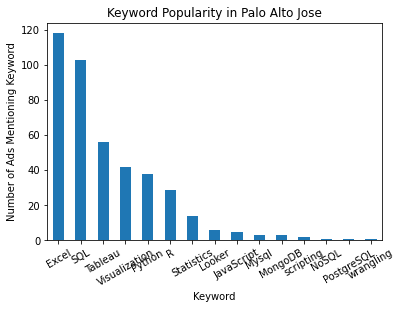

In [207]:
import matplotlib.pyplot as plt
%matplotlib inline

# get individual keyword counts as percentage of ads mentioning the keyword
fig, ax = plt.subplots(1, 1)
df.plot.bar(x='Keyword', rot=30, ax=ax, legend=False)
ax.set_ylabel('Number of Ads Mentioning Keyword')
ax.set_title('Keyword Popularity in Palo Alto Jose');

In [ ]:
# save information of items into a single table named 'deals' in 'msba'.
import pymysql
import warnings
import requests
import json
import codecs
from bs4 import BeautifulSoup

SQL_DB = "msba"
SQL_TABLE = "deals"
SQL_TABLE_DEF = "(" + \
        "item_id CHAR(12) NOT NULL PRIMARY KEY" + \
        ",seller_name VARCHAR(50)" + \
        ",seller_score INT" + \
        ",item_price INT" + \
        ",list_price INT" + \
        ",has_list_price BOOLEAN" + \
        ",number_sold INT" + \
        ",title VARCHAR(200)" + \
        ",return_allowed BOOLEAN" + \
        ",shipping_price INT" + \
        ",condition_status VARCHAR(100)" + \
        ")"

conn = pymysql.connect(host='localhost', user = 'root', password = '')
cursor = conn.cursor()

query = "CREATE DATABASE IF NOT EXISTS " + SQL_DB
print(query)
cursor.execute(query);

query = "CREATE TABLE IF NOT EXISTS " + SQL_DB + "." + SQL_TABLE + " " + SQL_TABLE_DEF + ";";
print(query)
cursor.execute(query);
cursor.close()
conn.close()


from sqlalchemy import create_engine
engine = create_engine('mysql://root:@localhost/msba')
items.to_sql('deals', con=engine, if_exists='replace')

# New York

Data Analyst, Full Time, New York, 50 Miles Radius

In [143]:
import requests
from bs4 import BeautifulSoup

data_analyst_url = 'https://www.monster.com/jobs/search/Full-Time_8?q=Data-Analyst&where=New-York__2c-NY&rad=50&stpage=1&page=6'
hdr = { 'User-Agent' : 'Mozilla/5.0 (Windows NT 6.1; Win64; x64)' }

response = requests.get(data_analyst_url, headers = hdr)
soup = BeautifulSoup(response.text, 'html.parser')

In [144]:
all_listings = soup.find_all('section', attrs={'data-jobid': True})
ids = [item['data-jobid'] for item in all_listings]

In [145]:
print(all_listings)

[<section class="card-content" data-jobid="225170148" data-postingid="601570fb-54e9-4c6c-921b-ac04d6436aa0" onclick="MKImpressionTrackingMouseDownHijack(this, event)">
<div class="flex-row">
<div class="mux-company-logo thumbnail is-loaded">
<img alt="CyberCoders" src="https://media.newjobs.com/clu/xcyb/xcyberc3x/branding/6344/CyberCoders-logo.jpg"/>
</div>
<div class="summary">
<header class="card-header">
<h2 class="title"><a data-bypass="true" data-m_impr_a_placement_id="JSR2CW" data-m_impr_j_cid="559" data-m_impr_j_coc="xcyberc3x" data-m_impr_j_jawsid="486080214" data-m_impr_j_jobid="225170148" data-m_impr_j_jpm="1" data-m_impr_j_jpt="1" data-m_impr_j_lat="40.7453" data-m_impr_j_lid="534" data-m_impr_j_long="-74.032" data-m_impr_j_occid="11866" data-m_impr_j_p="1" data-m_impr_j_postingid="601570fb-54e9-4c6c-921b-ac04d6436aa0" data-m_impr_j_pvc="monster" data-m_impr_s_t="t" data-m_impr_uuid="5af01099-75e2-41f4-aceb-aaed03e0b910" href="https://job-openings.monster.com/senior-data-ana

In [146]:
loc_strings = list()
for x in all_listings:
    loc_string = x.find('div', attrs={'class': 'location'}).find('span', attrs={'class': 'name'}).text.strip()
    
    if ',' in loc_string:
        city, state = [a.strip() for a in loc_string.split(',')]
        state = state[:2]  # two-letter state format
        loc_strings.append(', '.join([city, state]))
    else:
        loc_strings.append('')
    
companies = [x.find('div', attrs={'class': 'company'}).find('span', attrs={'class': 'name'}).text.strip()
             for x in all_listings]

job_titles = [x.find('h2', attrs={'class': 'title'}).find('a', href=True).string.strip() for x in all_listings]

print(job_titles[0])
print(companies[0])
print(loc_strings[0])

Senior Data Analyst - Pharma/Healthcare
CyberCoders
Hoboken, NJ


In [147]:
new_urls = [x.find('h2', attrs={'class': 'title'}).find('a', href=True)['href'] for x in all_listings]
new_urls[0]

'https://job-openings.monster.com/senior-data-analyst-pharma-healthcare-hoboken-nj-us-cybercoders/225170148'

In [148]:
from tqdm import trange
import time

new_job_url = dict()
job_description = dict() 
sal_description = dict()
for x in trange(0,len(all_listings)):
    new_job_url[x] = new_urls[x]
    response = requests.get(new_job_url[x])
    soup = BeautifulSoup(response.text, 'html.parser')
    
    job_body = soup.find('div', attrs={'name': 'value_description'})
    if job_body is None:
        job_body = soup.find('div', attrs={'class': 'full-jobview-container page-container'})
    if job_body is None:
        job_body = soup.find('a', attrs={'class': 'skip-main'})
    else: 
        job_body
    job_desc = job_body.get_text(separator=' ')  # add whitespace between HTML tags
    value_salary = soup.find('div', attrs={'class': 'detail-row row'})
    if value_salary is None:
        value_salary = soup.find('div', attrs={'class': 'full-jobview-container page-container'})
    if value_salary is None:
        value_salary = soup.find('a', attrs={'class': 'skip-main'})
    else: 
        value_salary
    sal_desc = value_salary.get_text(separator=' ')  # add whitespace between HTML tags
    print(job_desc[:500] + '...')
    print(sal_desc)
    job_description[x] = job_desc
    sal_description[x] = sal_desc
    time.sleep(0)

  1%|          | 1/152 [00:00<00:52,  2.86it/s]

If you are a Senior Data Analyst - Pharma/Healthcare with experience, please read on! Top Reasons to Work with Us We are an international healthcare consultancy specializing in end to end evidence development, optimization, and communication.  
The company's core competencies reside in Meta Research, Modeling, Data Analytics, Scientific Writing and Simulation & Risk Analytics. Senior Management has over 50 years of life sciences experience working in pharma, medical device, consulting, and acade...
Salary $110000  -  $150000   Per Year


  1%|▏         | 2/152 [00:01<01:11,  2.11it/s]

Synechron is a leading digital transformation consulting firm focused on the financial services industry and is working to Accelerate Digital initiatives for banks, asset managers, and insurance companies around the world. Synechron uniquely delivers these firms an end-to-end Digital, Consulting and Technology capabilities with expertise in wholesale banking, wealth management and insurance as well as emerging technologies like Blockchain, Artificial Intelligence, and Data Science. Based in New ...
Job Type fulltime ,  employee


  2%|▏         | 3/152 [00:01<01:02,  2.37it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description Understand existing processes and workflows through interactions wit...
Posted   3   days ago


  3%|▎         | 4/152 [00:02<01:25,  1.73it/s]

We are looking to fill a new Data Analyst role with our direct health insurer client in NYC.  This is a remote spot for now, however would need to be local to NYC once pandemic is over. Candidate should be focused on optimizing and building our marketing data infrastructure working alongside a wide variety of data, product and business teams. This person will work closely with marketing management, data science, data visualization, and analytics teams to support them by building data sets and da...
Job Type fulltime ,  employee


  3%|▎         | 5/152 [00:02<01:23,  1.75it/s]

Private Equity firm investing in real estate and healthcare sectors seeks a Temp to Perm Data Analyst Coordinator to start right away. The day to day responsibilities of this role will center around providing data entry/back office support for the investor relations and finance teams. Specifically, the coordinator will enter investor data into their CRM system, help generate reports and help reconcile all the data that is logged into the accounting system. This is a fantastic opportunity for som...
Job Type fulltime ,  employee


  4%|▍         | 6/152 [00:03<01:45,  1.38it/s]

Responsible for performing extensive detailed data analysis necessary to ensure strict adherence to data quality guidelines. This role will conduct full lifecycle activities to include requirements analysis and design, develop analytics and reporting capabilities, and continuously monitor performance and quality control plans to identify improvements and alerting of potential issues. This person is essential to gaining a better insight into the client's business data deficiencies, formulating a ...
Job Type fulltime ,  contract


  5%|▍         | 7/152 [00:04<01:50,  1.32it/s]

  Our client in Middlesex County, NJ, a leading philanthropic and social service agency, is seeking to hire a lead data professional , Data Manager/Analyst,  to help advance their philanthropic and fundraising efforts in an increasingly challenging and competitive marketplace.  This is a fast-paced office with a small team of about 15 people that are very “hands on”.  Prior Non-Profit experience would be a huge plus. Must be very advanced in Excel skills.  Must be US Citizen or Green Card  holde...
Salary $60000  -  $70000   Per Year


  5%|▌         | 8/152 [00:05<01:57,  1.22it/s]

Our company is looking for an Sr. Software Engineer/ Data Engineer/Big Data Analyst who will be performing following roles and responsibilities:  Serve as a technical liaison effectively working with large data and configuration of different tools/frameworks/products/ applications to meet specific project implementation objectives. Design, development, customization, integration and implementation of the software products Big Data, Data Analytics and Visualization solutions. Design and Develop B...
Job Type fulltime ,  employee


  6%|▌         | 9/152 [00:06<01:45,  1.35it/s]

Our client, one of the top US investment banks, offering securities underwriting and trading, mergers and acquisitions advice, research, private equity investment, and risk management products, is seeking a Data Analyst 4 (Non IT) Location:  Morrisville, NC Position Type:  Contract    Job Responsibilities: -To help scope out requirements for data management framework adoption.  -To help collect, collate and capture data elements as identified by report owners and data providers into excel spread...
Job Type fulltime ,  employee


  7%|▋         | 10/152 [00:06<01:35,  1.49it/s]

  Job Description We have an exciting opportunity for a Data Lineage Analyst with our industry-leading client in New York, NY. We will accept corp to corp or w2 contractors. For our w2 consultants, we offer a great benefits package that includes Medical, Dental, and Vision benefits, 401k with company matching, and life insurance. Responsibilities: Responsible for determining systems requirements for new or modified database application programs, creates the system specifications and Is responsib...
Job Type fulltime ,  employee


  7%|▋         | 11/152 [00:07<01:49,  1.29it/s]

We have been engaged to help our client find a  Business Analyst  with  retail or supermarket  experience located in their Carson, CA offices.  The company is a well known supermarket chain that is part of much larger parent company located primarily on the west coast. Summary The Retail Business Analyst will part of the Information Technology team within the Merchandising Analytics & Consumer Insights organization. The successful candidate will possess a strong mix of technical skills and busin...
Salary $75000  -  $95000   Per Year


  8%|▊         | 12/152 [00:08<01:40,  1.39it/s]

A client of Sharp Decisions Inc. is actively looking to bring on a  Data Analyst  to be based in  New York, NY.  E xperience building dashboards in Tableau is required.  Person will be working remote but when offices reopen, individual may be asked to go onsite. This is a  contract  only position for 4-6 months.  *W2 only. Overview The FP&A (Financial Planning & Analysis) group is seeking a Data Analyst to support our Business Intelligence Lead in continuing to build out an exciting new function...
Salary $35  -  $50   Per Hour


  9%|▊         | 13/152 [00:09<01:43,  1.34it/s]

Job Description: Partner with service owners of technology systems to define inventory data governance requirements and build consensus and agreement on the delivery, scope and timeline of IT data governance projects. Create Tableau and PowerBI dashboards to guide providers and consumers of inventory data in the management and governance of data quality improvement initiatives Facilitate, schedule and document working groups and steering committees around data quality management and governance E...
Salary $450  -  $500   Per Day


  9%|▉         | 14/152 [00:09<01:37,  1.42it/s]

Data Analyst, Salesforce One of our clients, medical devices and services company is looking for an enthusiastic  Data Analyst  with Salesforce experience and SAP as a big plus. ** Must be authorized to work in US for ANY EMPLOYER.    No H1 Visa support  for this position. The Location is Northern New Jersey Permanent position with great benefits. To be considered immediately please send your resume to igork@brainsworkgroup.com Job Summary:   Primary responsibilities include: governance, mainten...
Job Type fulltime ,  employee


 10%|▉         | 15/152 [00:10<01:50,  1.24it/s]

A rapidly growing e-commerce company is looking for a  Sales Data Analyst / Salesforce Admin  to join their team immediately on a contract basis with a possibility of going full-time for the right candidate. 
  Salary/Hourly Rate: 
  $35-45/hr 
  Position Overview: 
  A rapidly growing e-commerce company is looking for a Sales Data Analyst / Salesforce Admin to join their team immediately on a contract basis with a possibility of going full-time for the right person. This role will focus on repo...
Posted   19   days ago


 11%|█         | 16/152 [00:11<01:36,  1.41it/s]

Data Analyst Location: Newark, NJ Duration: 6+ month contract to hire Interview process: Phone and WebEx Req. # 20-01720 Contact: Brian Anderson banderson@contech-it.com D. 952-562-4101 Job Summary: Data analysts are experts with strong understanding of data structures and analysis. They are responsible for ensuring requirements around the accuracy, quality, completeness, and timeliness of data are captured and understood. They work hand in hand with Data Modelers, Data Developers, Data Stewards...
Job Type fulltime ,  contract


 11%|█         | 17/152 [00:12<01:49,  1.23it/s]

Focus on enhancing and delivering on a handful of key initial projects, including but not limited to KPI & Exec reporting, Strategy & Innovation team support, and B2B revenue reporting Help develop wider scope and projects, identify additional opportunities and measure against delivery of Business Intelligence roadmap according to timelines Revamp and build out revenue and KPI analysis to understand business performance measured against targets, strategies, and trends Develop understanding of da...
Salary $30  -  $35   Per Hour


 12%|█▏        | 18/152 [00:12<01:29,  1.49it/s]

NAVA Software Solutions is looking for a Sr. Data Analyst with PM exp. for one of our clients.       Details:   Sr. Data Analyst with PM exp.   Location: New York, NY - Remote till Covid   Duration: Full time/Permanent         Responsibilities:     Effectively interact with Business Management, Client Coverage and CRM & Sales Enablement teams to understand the business needs.   Lead projects to implement a client centric data architecture and execution of integrating data across multiple sources...
Job Type fulltime ,  employee


 12%|█▎        | 19/152 [00:13<01:17,  1.72it/s]

NGS DATA ANALYST SUMMIT, NJ    Project Description:   We seek a talented, collaborative inter-disciplinary computational scientist to work on the analysis, statistical modeling and generation of hypotheses from high-dimensional tissue, cell and molecular profiling data. This individual will play a key scientific role leveraging innovative computational analysis strategies and rich patient data to empower data-driven decisions in collaboration with the Client's Translational Development organizat...
Job Type fulltime ,  contract


 13%|█▎        | 20/152 [00:13<01:21,  1.62it/s]

Description: • Prepare analyses of integrated information from multiple systems to support routine and ad hoc reporting on the quality of safety information management from CEPs, CIT tools, and social listening activities. o Customer Interaction Tracking (CIT) tools are used by Commercial Customer Facing Colleagues to plan and track their interactions with Healthcare Professionals (HCPs), and may include product safety information reported by HCPs during these interactions. o Social listening in...
Job Type fulltime ,  employee


 14%|█▍        | 21/152 [00:14<01:09,  1.89it/s]

The job you asked for is not available....
The job you asked for is not available.


 14%|█▍        | 22/152 [00:14<01:14,  1.76it/s]

Introduction At IBM, work is more than a job - it's a calling: To build. To design. To code. To consult. To think along with clients and sell. To make markets. To invent. To collaborate. Not just to do something better, but to attempt things you've never thought possible. Are you ready to lead in this new era of technology and solve some of the world's most challenging problems? If so, lets talk. Your Role and Responsibilities Data analyst, responsible  for working with the Research community to...
Job Type fulltime ,  employee


 15%|█▌        | 23/152 [00:15<01:18,  1.64it/s]

                        LRS Consulting Services is seeking a Communication Specialist for our client in Stamford, CT. This is a long-term contract opportunity with the right-to-hire. LRS Consulting Services has been delivering IT excellence for over three decades. Our reputation for quality, flexibility, and strong relationships with our clients keeps them turning to us to meet their IT consulting needs. Our contacts combined with your technical expertise equals career possibilities for you. So ...
Posted   20   days ago


 16%|█▌        | 24/152 [00:15<01:07,  1.90it/s]

Our client, a world leading Food & Beverages Company in Purchase, NY is currently looking for a Data Analyst / Procurement Department to join their expanding team Position Details: Job Title:  Data Analyst / Procurement Department Duration: 3 months contract Location: Purchase, NY Note: Client has the  right-to-hire  you as a permanent employee at any time during or after the end of contract. You may participate in the  company group medical insurance plan Job Description: Assist with resolution...
Job Type fulltime ,  contract


 16%|█▋        | 25/152 [00:16<01:15,  1.67it/s]

                                              About USDM                           USDM Life Sciences is a premier consulting company with 20+ years of experience assisting heavily regulated biotech, medical device, and pharmaceutical companies with their GxP technologies to accelerate growth. Our deep domain knowledge and technology expertise in life sciences business processes are what sets us apart. From strategy to implementation and adoption, we have delivered thousands of GxP projects glob...
Job Type fulltime ,  employee


 17%|█▋        | 26/152 [00:16<01:04,  1.94it/s]

Location:   Monmouth (Township), IL Description:   Our client is currently seeking a Data Analyst (Entry)-Data Science-R&D    Knowledge in working with one or more of the following tools: SAS, Spotfire, J-Review, R, SAS, JavaScript, Python, or Perl.  A thorough understanding of data standards. Filter, tag, join, parse, and normalize data sets for use in analytical models.  Create reports and dashboards from a versatility of data. Work with data manager or steward to resolve data quality issues a...
Job Type fulltime ,  contract


 18%|█▊        | 27/152 [00:17<01:05,  1.91it/s]

 job summary: Our client is a global leader in the Pharmaceutical and CPG industries and is looking for a Data Science Analyst to join their growing team. 
 If you have 2-5 years of Analysis experience, a passion for data, and are looking for an opportunity to be challenged and grow your skills while doing work that makes a real impact, then we want to hear from you! 
    location: Raritan, New Jersey job type: Contract salary: $45 - 55  per hour work hours: 8am to 5pm education: Bachelors   res...
Salary $45  -  $55   Per Hour


 18%|█▊        | 28/152 [00:18<01:07,  1.84it/s]

  This large banking client of ours is looking for an experiences Marketing Analyst to join their team for a long term remote opportunity. They need someone with expert level experience using the Evergage platform, also known as Interaction Studio. If you come with that experience and have at least 5 years of marketing tenure then please keep reading!  Responsibilities 
	•Consults with and works across functional teams to strategize, plan and ensure execution of a variety of marketing, developme...
Salary $65  -  $67   Per Hour


 19%|█▉        | 29/152 [00:18<01:14,  1.65it/s]

Thorlabs is seeking candidates with strong analytical skills who are willing to take on a variety of business intelligence projects. This position is responsible for generating actionable data to support decisions related to sales and marketing, new business opportunities, product development, acquisitions, and the overall strategic direction of the company. He/she will be able to think of ways to creatively provide a basis for decisions on niche markets where more traditional sales and marketin...
Job Type fulltime ,  employee


 20%|█▉        | 30/152 [00:19<01:28,  1.37it/s]

Our client, a well-established health care facilities corporation seeks to hire a Business Intelligence Developer  to be based out of their NYC headquarters. They are looking for a creative and analytical individual with the ability and experience to study, validate, organize, and present data into meaningful reports and dashboards that drive well-informed business decisions. The Business Intelligence Developer will be responsible for identifying specific data needs from internal teams, analyzin...
Job Type fulltime ,  employee


 20%|██        | 31/152 [00:20<01:30,  1.34it/s]

We’re passionate, we’re collaborative and we are growing. AArete is looking for an experienced Pharmacy professional. You are highly analytical with an entrepreneurial spirit and commitment to excellence. You have the desire and ability to be part of a fast-growing area, with an opportunity for advancement.  You excel in a team environment and have the ability to flip tasks and priorities midstream because you love an exciting challenge. The bar is set high at AArete. There is a lot to do around...
Posted   14   days ago


 21%|██        | 32/152 [00:21<01:24,  1.42it/s]

ACS group has an immediate need for a "Data Scientist" with experience in the Pharmaceutical Industry. This is a 6 - month contract opportunity and is located in Lawrenceville, NJ. Our client is a leading Pharmaceutical company.   Please review the job description below:   Top Skills:  Bioinformatics Clinical Data Analysis GitHub Machine Learning Pharmaceutical / Clinical     Hiring manager Comments: EM is looking for a Data Scientist with a translational bioinformatics background for late stage...
Job Type fulltime ,  contract


 22%|██▏       | 33/152 [00:21<01:18,  1.51it/s]

Location:  US-NY-Melville Requisition ID:  24640 Category:  Audit/Compliance Position Type:  Full-Time Overview Canon U.S.A., Inc. is seeking a Business Intelligence Analyst/Data Analytics (Analyst, Business Intelligence) savvy professional to join our Audit & Business Consultation team. We're looking to study our internal data sources to drive insight & value through analytics/visualization & improve efficiencies through process automation. In this role, you will be expected to understand busin...
Posted   1   Day ago


 22%|██▏       | 34/152 [00:22<01:20,  1.47it/s]

Job Requisition Number: 89108 This position can sit in Princeton NJ or NYC 
 **Please note this is a contract position** 
  
Bloomberg runs on data. As the Enterprise Data Warehouse and Business Intelligence team, we are responsible for driving analytics throughout the organization to improve our products, engage better with our customers, create greater efficiencies, and drive new businesses by providing insights into the data. Can you change the way our business works? 
  
Are you motivated to...
Posted   2   days ago


 23%|██▎       | 35/152 [00:23<01:17,  1.52it/s]

Data is fundamental to making informed business and people decisions.  Dedicated teams focus on data development, governance and analytics to ensure our firm manages all aspects of the data cycle -- from building and controlling to maintaining and delivering large data sets -- in the most effective and efficient way. Data teams across the firm embody a keen attention to detail and quantitative discipline. Divisions and Job Functions Please note division and function examples are representative o...
Job Type fulltime ,  employee


 24%|██▎       | 36/152 [00:23<01:05,  1.78it/s]

MSI has partnered with a leading company in Melville, NY in their search for a skilled BI Analyst. This is a great opportunity to join a great organization with a strong reputation.  Permanent role with full benefit package available! Seeking:  3-5 years of experience as a Business Analyst. Experience with SQL, ETL, Tableau and Python Experience with Reporting and Analytics. Bachelor's degree required Our client is motivated to move quickly on this role, apply today!...
Job Type fulltime ,  employee


 24%|██▍       | 37/152 [00:24<01:10,  1.63it/s]

Job Title:  Data Test Engineer (SDET)  Location:  Remote  Job Type:  Contract   Summary  Data Test Engineers (SDET) test and verify applications developed under data pipelines using Java programming language & Apache Kafka and work closely with the data development teams to validate events and analytics.  This role is a DTE with a focus on data application validation. In this role you will apply your SDET and SQL experience to verify multiple data applications and tools. This DTE will work with ...
Job Type fulltime ,  contract


 25%|██▌       | 38/152 [00:24<01:11,  1.59it/s]

Find what drives you on a team with a 70+ year history of being recognized for discovery, determination, and innovation. As         a global leader in high-tech filtration, separation, and purification, Pall Corporation thrives on helping our customers protect         people. Our portfolio is broad, so if your interests lie along the spectrum of Life Sciences to Industrial, you'll find a         rewarding role here. Our career opportunities are as diverse as our products and they are all focused...
Job Type fulltime ,  employee


 26%|██▌       | 39/152 [00:25<01:19,  1.43it/s]

Requisition ID:  63281   Job Function/Category:  Business Services   Employment Type:  Exempt Full Time    This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey.  PSEG has more than 12,000 employee...
Job Type fulltime ,  employee


 26%|██▋       | 40/152 [00:26<01:07,  1.66it/s]

More than 30 years ago, E*TRADE pioneered the online brokerage industry by executing the first-ever electronic individual          investor trade. While the landscape of our industry has changed dramatically, our culture of innovation and drive to make          online trading accessible to everyone continues to drive us forward. We believe in challenging the status quo, fostering an          environment of curiosity and learning, and, above all, putting our customers first. SUMMARY The          ...
Job Type fulltime ,  employee


 27%|██▋       | 41/152 [00:26<01:09,  1.60it/s]

We are looking for ambitious 2020 & 2021 graduates to join a leading private equity advisory and placement group in New York. This is an amazing and rare opportunity for graduates to launch their career in private equity. This role would suit a recent or upcoming graduate with good internship experience who is keen to develop their understanding of the Private Equity industry and work in a varied, fast-paced environment. The role supports the Deals team, delivering high-quality outputs to the cl...
Salary $60000   Per Year


 28%|██▊       | 42/152 [00:27<01:09,  1.58it/s]

Bracco Diagnostics Inc., has an opening for a Contract & Pricing Analyst in the Monroe, NJ office.    CONTRACT AND PRICING ANALYST     SUMMARY:         	Responsible for the execution of time sensitive, process related activities pertaining to end-to-end contract management, analytics, reporting, internal auditing, rebate & admin fee processing, and contract language analysis. Additionally, this position will have a focus on project management in a fast-paced team environment.      DUTIES AND RES...
Job Type fulltime ,  employee


 28%|██▊       | 43/152 [00:28<01:08,  1.58it/s]

EBP Supply Solutions,  a leading provider of Cleaning and Food Service supplies and services to commercial institutions, is currently seeking an  experienced , conscientious, detail oriented and enthusiastic  Junior Business Analyst  to join our team in Milford, CT. As part our Business Analytics Group, the  Junior Business Analyst  position will support all departments within the organization, responsible for gathering and analyzing information, and delivering timely, accurate information on re...
Salary $48000  -  $52000   Per Year


 29%|██▉       | 44/152 [00:28<01:03,  1.70it/s]

Sr Analyst, Compensation & Benefits   PBF Energy Inc. (NYSE:PBF) is one of the largest independent refiners in North America, operating through its subsidiaries, oil refineries and related facilities.  We are seeking a talented Sr Analyst, Compensation & Benefits to join our team as a pivotal member that would play a key role here at PBF Energy. This role would be located in our Company headquarters in Parsippany, NJ. This position will assist with the design and administration of the organizati...
Job Type fulltime ,  employee


 30%|██▉       | 45/152 [00:29<01:07,  1.58it/s]

Overview The Office of Audit and Compliance (OAC) serves as a proactive partner and trusted adviser to University management and departments to assess and support the mitigation of risks that may have a significant impact on the achievement of the University’s objectives. The goal of the OAC is to promote a culture of risk and compliance awareness at the institution through the services it provides. OAC seeks an experienced candidate with high professional and ethical standards who will provide ...
Posted   11   days ago


 30%|███       | 46/152 [00:30<01:09,  1.53it/s]

Contributes to process optimization, support analysis of current and future state processes through modeling using BPM (Business Process Management) techniques, and help define and optimize how relevant business information flows throughout the organization. Performs complex analysis to troubleshoot operational and application issues, particularly involving third party business applications that are in production. Promptly acknowledges requests from business units, performs various levels of ana...
Job Type fulltime ,  employee


 31%|███       | 47/152 [00:31<01:24,  1.24it/s]

Financial Analyst   Goya Foods, Inc., a leader in the food industry based in Jersey City, New Jersey is seeking a Financial Analyst to provide analysis, communications and actions with the objective of providing insights, prompting actions and taking actions to improve business performance and profitability. The ideal candidate will  report  to the Vice President of Finance .   Duties and Responsibilities:     Daily/weekly/monthly sales, gross profit, expense and other key performance (KPIs) rep...
Job Type fulltime ,  employee


 32%|███▏      | 48/152 [00:31<01:13,  1.41it/s]

Overview Position requires interactional work, efficiently coordinating with the members of the Finance Department to develop Power BI dashboards, and assist in streamlining current processes within the Finance Team using Power BI.  This includes decision support Power BI models to provide visibility and assessment of financial data. This is a highly visible position and is required to make independent decisions.   Responsibilities   Establish, manage, and assist in the development of Power BI r...
Job Type fulltime ,  employee


 32%|███▏      | 49/152 [00:32<01:09,  1.48it/s]

If you are a Senior SAS Data Analyst - RWE/Claims with experience, please read on! Top Reasons to Work with Us We are an international healthcare consultancy specializing in end to end evidence development, optimization, and communication.  
The company's core competencies reside in Meta Research, Modeling, Data Analytics, Scientific Writing and Simulation & Risk Analytics. Senior Management has over 50 years of life sciences experience working in pharma, medical device, consulting, and academia...
Salary $110000  -  $150000   Per Year


 33%|███▎      | 50/152 [00:32<00:58,  1.75it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description Assist in the planning, design, and development of new applications ...
Posted   17   days ago


 34%|███▎      | 51/152 [00:33<01:03,  1.59it/s]

Our company is looking for an Lead Data Business Intelligence Analyst who will be performing following roles and responsibilities:  Building, enhancing, testing, integrating various custom dashboards, management reports, business intelligence and data analytics modules and reports; Customizing products for each study protocol and for each client; Technical contribution and technical spec preparation of application design, database design, component design, architecture and framework design, data...
Job Type fulltime ,  employee


 34%|███▍      | 52/152 [00:33<00:54,  1.84it/s]

LEAD DATA ANALYST - 6-MONTHS RIGHT TO HIRE NEWARK, NJ If interested in discussing, please call Rita 914-461-1670 or email  rdelosa@contech-it.com Job Summary: Data analysts are experts with strong understanding of data structures and analysis. They are responsible for ensuring requirements around the accuracy, quality, completeness, and timeliness of data are captured and understood. They work hand in hand with Data Modelers, Data Developers, Data Stewards and Business  SMEs  to ensure the custo...
Job Type fulltime ,  contract


 35%|███▍      | 53/152 [00:34<00:47,  2.10it/s]

NAVA Software Solutions is looking for a Sr. Data Analyst for one of our clients.       Details:   Sr. Data Analyst   Location: New York, NY     Remote till covid   Duration: Full time/Permanent       Mandatory: MS SQL   Better to have: Python       This is a brand new team that is being built from the ground floor. Hiring Manager is a SVP, Head of Enterprise data Governance. She seeks (2) 5-10 year people who will report directly to her to assist her in building out the roadmap for and standing...
Job Type fulltime ,  employee


 36%|███▌      | 54/152 [00:34<00:51,  1.89it/s]

PROJECT COORDINATOR/QUALITY ANALYST WITH PHARMACEUTICAL AND DATA ANALYSIS EXP. BRANCHBURG, NJ   Project Description:   The Data Integrity Project Analyst, with minimal supervision, manages cross-functional, complex projects utilizing PMI methodology This position is responsible for the management, coordination, implementation, and control of local Data Integrity projects, while ensuring alignment with the strategy, priorities, and goals of the site. This role must interact and influence at all l...
Job Type fulltime ,  contract


 36%|███▌      | 55/152 [00:35<00:47,  2.03it/s]

Position Details: Our client, a world-leading Pharmaceutical Company in  Peapack , NJ is currently looking for a Senior Data Analyst (MS Access, Excel) to join their expanding team. Job Title: Senior Data Analyst (MS Access, Excel) Duration: 18 Months Contract Location:  Peapack , NJ Note: Client has the  right-to-hire  you as a permanent employee at any time during or after the end of contract. You may participate in the  company group medical insurance plan. Job Description:  Prepare  analyses...
Job Type fulltime ,  contract


 37%|███▋      | 56/152 [00:35<00:42,  2.28it/s]

Title for this position: Business Data Analyst Onsite:   yes, remote to start  Longterm contract This position is located in Montvale, NJ   Responsibilities:    Work with a multi-disciplinary team   Partner with Product Managers and SMEs to elicit and document existing data points and applications processes   Analyze and document process discrepancies and/or application integration issues; identify and obtain agreement on process improvements   Develop a data model across multiple applications; ...
Job Type fulltime ,  employee


 38%|███▊      | 57/152 [00:36<00:48,  1.94it/s]

  Job Description Our industry-leading client is seeking a short-term BI Application Migration Manager to manage a data center migration from end-to-end. Due to client requirement, applicants must be willing and able to work on a w2 basis. For our w2 consultants, we offer a great benefits package that includes Medical, Dental, and Vision benefits, 401k with company matching, and life insurance. Requirements of the BI Application Migration Manager: Bachelor's degree or equivalent and at least 7 y...
Job Type fulltime ,  employee


 38%|███▊      | 58/152 [00:36<00:53,  1.76it/s]

 job summary: Our client, a growing service provider offering a cloud-based analytics tool that helps the competitive retail market.  They are a fast-moving environment where learning, thinking outside the box and collaboration are always encouraged.  This is a unique opportunity to join an exciting company, make your mark on a growing business and learn from smart and interesting colleagues.  The position requires architecting, designing and programming of the company Applications involving SW ...
Salary $125000  -  $139999.99   Per Year


 39%|███▉      | 59/152 [00:37<01:08,  1.36it/s]

Location:   Princeton, NJ Description:   Our client is currently seeking a MS BI Reports Developer for a permanent/direct hire position based in the Princeton, NJ area. Visa Sponsorship is not available for this position. Qualified candidates may email JGearhart@Judge.com for immediate consideration.   Qualifications & Requirements: 10 years experience in SQL Server Development, Data warehousing, Data Analysis and Business Intelligence Reporting applications as a BI/Database Developer with exper...
Job Type fulltime ,  employee


 39%|███▉      | 60/152 [00:38<01:03,  1.45it/s]

Introduction Known as the 'knowledge behind the numbers', Financial Analysts are considered to be trusted business advisors, working within IBM’s business units and geographies, as well as in a myriad of specialized corporate functions. IBM's finance organization is instrumental in driving innovative improvements to global financial processes while providing measurable value to the business. Your Role and Responsibilities AI, Cloud, Blockchain, Internet of Things (IoT)—IBM does more than just cr...
Job Type fulltime ,  employee


 40%|████      | 61/152 [00:38<00:57,  1.58it/s]

About Synechron: Synechron is a leading digital transformation consulting firm focused on the financial services industry and is working to Accelerate Digital initiatives for banks, asset managers, and insurance companies around the world. Synechron uniquely delivers these firms an end-to-end Digital, Consulting and Technology capabilities with expertise in wholesale banking, wealth management and insurance as well as emerging technologies like Blockchain, Artificial Intelligence, and Data Scien...
Job Type fulltime ,  employee


 41%|████      | 62/152 [00:39<00:49,  1.81it/s]

Requisition ID:  64636   Job Function/Category:  Administrative Support   Employment Type:  Non-Exempt Full Time    This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey.  PSEG has more than 12,000...
Job Type fulltime ,  employee


 41%|████▏     | 63/152 [00:39<00:45,  1.97it/s]

We are looking for ambitious 2020 & 2021 graduates to join a leading private equity advisory and placement group in New York. This is an amazing and rare opportunity for graduates to launch their career in private equity. This role would suit a recent or upcoming graduate with good internship experience who is keen to develop their understanding of the Private Equity industry and work in a varied, fast-paced environment. The role supports the Deals team, delivering high-quality outputs to the cl...
Salary $60000   Per Year


 42%|████▏     | 64/152 [00:40<00:46,  1.91it/s]

If you are a Senior R Data Analyst - RWE/Claims with experience, please read on! Top Reasons to Work with Us We are an international healthcare consultancy specializing in end to end evidence development, optimization, and communication.  
The company's core competencies reside in Meta Research, Modeling, Data Analytics, Scientific Writing and Simulation & Risk Analytics. Senior Management has over 50 years of life sciences experience working in pharma, medical device, consulting, and academia. ...
Salary $100000  -  $150000   Per Year


 43%|████▎     | 65/152 [00:40<00:42,  2.07it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description 
 
 Conduct credit risk focused business and data analysis 
 Credit ...
Posted 30+ days ago


 43%|████▎     | 66/152 [00:41<00:44,  1.93it/s]

Job Description: EM is looking for a Data Scientist with a translational bioinformatics background for late stage oncology studies. Strong statistical modeling and analysis experience. wanted. They will analyze the molecular profiles of diseases, so Translational or Precision medicine experience is also wanted. Candidate should be able to speak Cox model, logistical regression, random effect, mixed effected models and Time-varying covariates. They should know when to use each model. Strong R and...
Job Type fulltime ,  employee


 44%|████▍     | 67/152 [00:42<00:49,  1.71it/s]

 job summary: Our enterprise client has a temp to perm opportunity for an experienced Business Intelligence (BI) Analyst to identify business intelligence, reporting, and data analysis needs. 
  Candidate will work closely with Business and Technical teams to turn data into critical information and knowledge that can be used to make sound business decisions. 
  BI Analysts must understand how data is turned into information and knowledge and how that knowledge supports and enables key business p...
Salary $55  -  $69   Per Hour


 45%|████▍     | 68/152 [00:42<00:48,  1.72it/s]

About Synechron : Synechron is one of the fastest-growing digital, business consulting & technology firms in the world. Specialized in financial services, the business’ focus on embracing the most cutting-edge innovations combined with expert knowledge and technical expertise has allowed Synechron to reach $500+ million in annual revenue, 8,000 employees and 18 offices worldwide.  Synechron is agile enough to invest R&D into the latest technologies to help financial services firms stand at the c...
Job Type part time ,  employee


 45%|████▌     | 69/152 [00:43<00:54,  1.51it/s]

Requisition ID:  64583   Job Function/Category:  Finance / Accounting   Employment Type:  Exempt Full Time    This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey.  PSEG has more than 12,000 emplo...
Job Type fulltime ,  employee


 46%|████▌     | 70/152 [00:44<01:08,  1.20it/s]

Introduction At IBM, our Project Managers excel by leading and coordinating a project team’s overall performance, scope, cost, and deliverables. Our clients rely on timely and efficient status reports, and as Project Manager, you will drive the charge with project direction, metric definition, and performance management. If you are ready to help our clients and project teams succeed, we would love to meet you! Your Role and Responsibilities Introduction: (IT Specialist – Business Analyst)   Busi...
Job Type fulltime ,  employee


 47%|████▋     | 71/152 [00:45<00:55,  1.47it/s]

If you are a Data Analyst with experience, please read on! 
We are a growing, entrepreneurial, fast paced organization looking for a Data Analyst to join our team! 
 
We are looking for someone who is super strong in SQL and Excel with a background in financial reporting. What You Need for this Position - Bachelor's degree - 4+ years of Data Analyst experience 
- Expert skills in SQL Server 
- Expert skills in Excel 
- Solid knowledge of financial reporting , general accounting, operations, cash...
Job Type fulltime ,  employee


 47%|████▋     | 72/152 [00:45<00:51,  1.56it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description 

This role operates in both a reporting analyst and data analyst ca...
Posted 30+ days ago


 48%|████▊     | 73/152 [00:46<00:53,  1.47it/s]

 job summary: Randstad Technologies is hiring and we're looking for someone like YOU to join our team!  If you are seeking a new opportunity, looking to grow in your career, or you know someone who is - we want to hear from you!  Take a look at the below opportunity, or feel free to visit RandstadUSA.com to view and apply to any of our open roles. 
    location: Basking Ridge, New Jersey job type: Contract salary: $65 - 69  per hour work hours: 8am to 5pm education: Bachelors   responsibilities:...
Salary $65  -  $69   Per Hour


 49%|████▊     | 74/152 [00:46<00:50,  1.56it/s]

Business Intelligence Engineer  6 months plus possible extensions  Remote - working PST Hours  Please send resumes to Karen.Bigini@nttdata.com  We are looking for a  Business Intelligence Engineer to join a  leading media and entertainment company that creates and distributes premium and popular content Globally.  The  streaming entertainment offering within this group was launched in May 2020 and is the culmination of some of the most innovative new technology and greatest creative talent in th...
Job Type fulltime ,  employee


 49%|████▉     | 75/152 [00:47<00:54,  1.42it/s]

Requisition ID: 63743  Job Function/Category: Operations  Employment Type: Exempt Full Time   This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey. PSEG has more than 12,000 employees who are dedi...
Job Type fulltime ,  employee


 50%|█████     | 76/152 [00:48<00:57,  1.33it/s]

Introduction Are you looking for a career that will allow you to use your unique blend of business acumen and tech savvy? Business Analysts at IBM are subject matter experts that build the bridge between our business and our clients, immersing themselves into the market to understand problems and find innovative solutions. Be ready to navigate the complex relationships that make the business world run and find the actionable insights that result in great business decisions. Your Role and Respons...
Job Type fulltime ,  employee


 51%|█████     | 77/152 [00:49<00:59,  1.27it/s]

  SUMMARY:   The position of Epic Analyst requires an individual that possesses functional knowledge and skills in EPIC products that are used to conduct clinical operations. The Epic Analyst will be responsible for workflow analysis, building, training, troubleshooting, go-live and post go-live support and optimization. This position will provide guidance in the development of end user requests; perform maintenance, as well as troubleshoot the Epic applications. The candidate will participate i...
Job Type fulltime ,  employee


 51%|█████▏    | 78/152 [00:50<00:54,  1.36it/s]

Senior Insurance Product Analyst Job Information While we’ve been named a 'best place to work,' our proudest accomplishment comes from serving nearly 17 million AAA Members. Through our commitment to service, growth and people, CSAA Insurance Group will create AAA members for life by fulfilling our promise to be there when they need us! Are you an experienced Senior Analyst with strong business acumen, ready to take on more leadership and provide data-driven insights in a complex environment to ...
Posted   3   days ago


 52%|█████▏    | 79/152 [00:51<01:02,  1.16it/s]

Primary Job Duties & Responsibilities: Elicit, gather, analyze and validate customer and end user needs by: discovery/research, data analysis, gap analysis, interviews, documenting complex process/task/work flows, storyboards, user stories, scenarios, use cases and by other BA methods. Identify scope and parameters of requirements analysis on a project-by-project basis to define impact, outcome criteria and metrics. Collaborate with internal and external stakeholders, to assess cross product and...
Job Type fulltime ,  contract


 53%|█████▎    | 80/152 [00:51<00:56,  1.27it/s]

Position Overview:  The Open-Source Security Analyst is ideally based Baltimore, MD. Candidates may also be considered in Fort Worth, New York City, Evansville, and Fort Mill. Open-Source Security Analyst will scan, track, analyze, and report on vulnerabilities in open-source software as part of the vulnerability management process. To accomplish this, you will work closely with our internal security teams, managed service providers, project team, and other partners to help develop an open-sourc...
Posted Today


 53%|█████▎    | 81/152 [00:52<00:46,  1.52it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description 

The Data Analyst will be expected to perform the following tasks i...
Posted   29   days ago


 54%|█████▍    | 82/152 [00:52<00:44,  1.56it/s]

We are constantly improving our capabilities to increase product discoverability and decrease the time between a customers search and purchase. 
If you are a Director of Data Analytics with experience, please read on! What You Will Be Doing - Utilize internal & external data sources to identify promising new trends to aid in marketing strategy and product development - Develop a deep knowledge of both our dataset & our clients' product categories 
- Oversee a small team of data analysts & virtua...
Salary $180000  -  $225000   Per Year


 55%|█████▍    | 83/152 [00:53<00:48,  1.43it/s]

 job summary: Our client, a growing Financial Services firm is growing their Chief Data Office (CDO) team is seeking an Enterprise Data & Business Intelligence (BI) Platform Leader to join the New York City location. This is an opportunity to influence and innovate as part of the new CDO function. A primary objective of this role is to enable internal and external customers to easily access and consume data to support new product innovation, existing product workflows, operational reporting and ...
Salary $220000  -  $230000   Per Year


 55%|█████▌    | 84/152 [00:54<00:49,  1.38it/s]

Requisition ID:  65339   Job Function/Category:  Communications   Employment Type:  Exempt Full Time    This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey.  PSEG has more than 12,000 employees w...
Job Type fulltime ,  employee


 56%|█████▌    | 85/152 [00:55<00:46,  1.44it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description 

* Transforming existing excel reports into Tableau dashboards

* D...
Posted   11   days ago


 57%|█████▋    | 86/152 [00:55<00:44,  1.48it/s]

Requisition ID:  65307   Job Function/Category:  Customer Services   Employment Type:  Non-Exempt Full Time    This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey.  PSEG has more than 12,000 empl...
Job Type fulltime ,  employee


 57%|█████▋    | 87/152 [00:56<00:53,  1.21it/s]

If you are a Senior Revenue Operations Analyst with Tableau and SQL experience, please read on! 
We are one of the worlds leading providers of cloud-based technology and software solutions. Our mission is to provide small and medium sized business with the right technology in order to achieve their goals.  
 
If you are a Senior Revenue Operations Analyst who wants to work at a company that motivates and empowers its employees please apply today! Top Reasons to Work with Us -Culture of collabora...
Salary $100000  -  $130000   Per Year


 58%|█████▊    | 88/152 [00:57<00:46,  1.39it/s]

The job you asked for is not available....
The job you asked for is not available.


 59%|█████▊    | 89/152 [00:57<00:40,  1.54it/s]

Bay State Search has teamed up with our client a World Class Software and Information Service Provider company located in New York, NY.  We have been asked to identify a Financial Analyst with strong Excel. This person will be asked to complete interesting and challenging analytical projects with the Finance Manager.  Be able to separate the “signal from the noise”.  The ideal candidate will thrive in a high-profile collaborative environment   ABOUT THE ROLE This is a high-profile role that will...
Salary $25  -  $25   Per Hour


 59%|█████▉    | 90/152 [00:58<00:35,  1.75it/s]

Looking for an IT PM/BA with strong project management and excellent analysis skills Data analysis experience( Trade data preferred but any other will work) Heavy SQL to do comparisons. Experience in risk management. Experienced in  Issue identification, escalation and resolution. Excellent Written, Presentation and Communication Skills with ability to manage and influence across teams. Good understanding of SDLC knowledge. Good with object oriented knowledge (python) and technically strong Very...
Job Type fulltime ,  contract


 60%|█████▉    | 91/152 [00:59<00:39,  1.55it/s]

CMBS Analyst As a Commercial Mortgage Backed Securities (CMBS) Analyst, you will conduct thorough quantitative and qualitative analysis on the underlying loans and properties that collateralize Commercial Mortgage Backed Securities transactions. In addition, you will assist other analysts with setting up Net Cash flow models; assist with special projects/initiatives, as needed. - Analyze the credit risk in SF securities by performing tasks that includes reviewing deal documents, surveillance, an...
Salary $65000  -  $80000   Per Year


 61%|██████    | 92/152 [00:59<00:41,  1.45it/s]

Our client, a multinational electronics company, is seeking a Business Professional - Supply Chain Analyst 4 Location:  Ridgefield Park, NJ Position Type:  Contract    Job Summary: HA Builder SCM department is responsible for managing supply chain initiatives, forecasting, planning inventory and meeting delivery requirements including providing recommendations and solutions to the business team including Executives. The Senior Manager, Builder SCM is responsible for managing a wide range of prod...
Job Type fulltime ,  employee


 61%|██████    | 93/152 [01:00<00:39,  1.50it/s]

CYBERSECURITY ANALYST   One of our global clients is seeking a Cybersecurity Analyst that will be responsible for incident detection and response, threat hunting, and data analysis to protect and maintain the overall security of the corporation. Responsibilities The Cybersecurity Analyst will be responsible for, but not limited to the following:  D etect threats through all stages of an attack Investigate security events Gather forensic evidence for investigation and remediation Analyze a variet...
Job Type fulltime ,  employee


 62%|██████▏   | 94/152 [01:01<00:40,  1.43it/s]

  Job Description     **Remote opportunity; qualified candidates will be able to support EST work hours.   We have an exciting opportunity for a Business Analyst with our industry-leading client in NYC.     We will accept corp to corp or w2 contractors. For our w2 consultants, we offer a great benefits package that includes Medical, Dental, and Vision benefits, 401k with company matching, and life insurance.       Responsibilities:       Gather, analyze, document, and validate end user requireme...
Job Type fulltime ,  employee


 62%|██████▎   | 95/152 [01:01<00:39,  1.43it/s]

Investment Operations Analyst  – New York, NY  

We are currently seeking candidates for an Investment Operations Analyst position located in New York, NY 10104. The position is with an elite investment management firm and the operations analyst will work on the fixed income team. The ideal candidate will have strong excel skills and a business degree. 

This role is a 6+ month contract to hire opportunity that pays $19 per hour within a 40-hour workweek 
 Responsibilities: Monitor cash flows, d...
Salary 19   Per Hour


 63%|██████▎   | 96/152 [01:03<00:47,  1.18it/s]

Overview 
 Job Summary 
   
 The Diversity and Inclusion Analyst shall support the D&I department with metrics and data to support measurement of diversity effectiveness of external (public facing) programs and internal (staff focused) workplace inclusion strategy development. The D&I Program Analyst/Equity Officer is responsible for carrying out research, analytic work, and collecting internal data and external benchmarks to support diversity strategy development as well as develop and sustain ...
Salary $48540  -  $60675   Per Year


 64%|██████▍   | 97/152 [01:04<00:51,  1.07it/s]

The job you asked for is not available....
The job you asked for is not available.


 64%|██████▍   | 98/152 [01:04<00:43,  1.25it/s]

What does a great Business Analyst, Sr do? We are looking for a person to join our team in a critical role of the Business Analyst. You will work with our internal client defining and refining the business needs into actionable user stores and tasks Working directly for the Delivery Lead / Product Owner, you will serve a liaison between Client team, Development team and Data Warehouse team You will be instrumental in data identification, data analysis, unit testing and managing user testing & si...
Posted   1   Day ago


 65%|██████▌   | 99/152 [01:05<00:42,  1.26it/s]

Senior Product Analyst-Insurance  Job Information While weve been named a 'best place to work,' our proudest accomplishment comes from serving nearly 17 million AAA Members. Through our commitment to service, growth and people, CSAA Insurance Group will create AAA members for life by fulfilling our promise to be there when they need us! Are you an experienced Senior Analyst with strong business acumen, ready to take on more leadership and provide data-driven insights in a complex environment to...
Posted   2   days ago


 66%|██████▌   | 100/152 [01:06<00:47,  1.10it/s]

Business Analyst Job Number: 21-01649   Want to be part of the Energy Industry? Eclaro is looking for a  Business Analyst  for our client in  White Plains, NY .     Eclaro's Client is America's largest state power organization and is a national leader in energy efficiency and clean energy technology. If you’re up to the challenge, then take a chance at this rewarding opportunity!   Responsibilities:   Expected to deliver the following activities over the course of the engagement :     Perform da...
Job Type fulltime ,  employee


 66%|██████▋   | 101/152 [01:07<00:44,  1.15it/s]

 job summary: Description: •This role is for an individual contributor to support the ATLAS suite of platforms that deliver key data management capabilities in support of Corporate Treasury Data Management, Global Liquidity Management and Enterprise-wide upstream and downstream systems.  •Candidate must possess senior level skills with tools/products used in data analysis and a understanding of data technologies, such as ETL, Relational databases, and SQL. Must have experience in all aspects of ...
Salary $46  -  $56   Per Hour


 67%|██████▋   | 102/152 [01:08<00:41,  1.21it/s]

Our client, a leading global financial services company, has approximately 200 million customer accounts and does business in more than 140 countries. They provide consumers, corporations, governments and institutions with financial products and services, including consumer banking and credit, corporate and investment banking, securities brokerage, transaction services, and wealth management. Description: --Candidate must be articulate- excellent communication skills to present to Sr. Stakeholde...
Job Type fulltime ,  contract


 68%|██████▊   | 103/152 [01:08<00:34,  1.44it/s]

Emergency Management Watch Analyst The Port Authority of New York and New Jersey (PANYNJ) Office of Emergency Management (OEM) Emergency Management Watch Analyst has the primary responsibility for maintaining situational awareness of the Port Authority of New York and New Jersey facilities. PANYNJ OEM is seeking a highly motivated professional who likes challenge; committed to delivering high quality work that can work in a fast-paced operations center environment, manage tasks and act as the ma...
Job Type fulltime ,  employee


 68%|██████▊   | 104/152 [01:09<00:31,  1.52it/s]

Description: We are looking for a passionate Business Analyst to gather business requirement, co-work with software engineer to make up software solutions and execute task management. Business Analyst responsibilities include gathering user requirements, bridge the communication between user and software engineer, functional spec documentation, data issue analysis and development task management. The people who have the basic concept of software development life cycle (SDLC), experienced in SQL,...
Job Type part time ,  employee


 69%|██████▉   | 105/152 [01:09<00:29,  1.57it/s]

Numbers-driven functions and teams which strive to create functional experts and value analytical thinkers. These teams contribute to the firm by partnering with each of the firm's businesses to understand and manage risks, measure profitability, and create solutions through quantitative analysis, projecting, budgeting and forecasting.  Divisions and Job Functions Please note division and function examples are representative of opportunities common for this skill-set. The list is not exhaustive,...
Job Type fulltime ,  employee


 70%|██████▉   | 106/152 [01:10<00:27,  1.69it/s]

Responsibilities: Provide substantive and administrative support in the area of contract management for the project management, project controls, and construction management processes of the Electric T&D organization. Participate in “cradle to grave” contract management, from early involvement with developing the scope of work, RFx process, contract negotiation, contract award, contract maintenance, through contract closeout. Review contracts to identify key contract rights and obligations, prep...
Job Type fulltime ,  contract


 70%|███████   | 107/152 [01:10<00:23,  1.94it/s]

Contest Operations Analyst - Fantasy Sports New York, NY OR Los Angeles, CA (Remote until Pandemic) 12 Months Contract with possible extensions As a Contest Operations Analyst your role will include the creation, monitoring,and analysis of our daily fantasy sports contests.  You will also assist in product management duties to help drive growth across Fantasy Sports.  We are looking for someone with a passion for fantasy sports and excellent analytical skills. Your Day:   Creation and monitoring...
Salary $50  -  $60   Per Hour


 71%|███████   | 108/152 [01:11<00:22,  1.96it/s]

 Job Title: Proposal & Contract Analyst Job type: 12month Contract ( temp to perm) Job Location: Lower Manhattan, New York ( remote for now) Company Profile A leading technology company that provides cloud-based data, analytics, and mobile solutions to the life sciences industry in the United States and internationally Job Summary The Analyst, Proposals & Contracts supports Global/Regional Account Managers, Sales Management, and the Professional Services department in the drafting of Sales Order...
Salary $30  -  $35   Per Hour


 72%|███████▏  | 109/152 [01:12<00:29,  1.47it/s]

Hi, This is Shibham and I’m a working with Ascent Group - an ACS company, a leading information technology services and workforce solutions company. ACS Group works closely with Fortune 1000 firms throughout the US and provides top talent for various staffing needs across industries. We currently have an opportunity for Demand Analyst - 11830786 with one of our clients in Summit, NJ 07901. If you are interested feel free to call me at (678) 496-7805 or reply to this email with your updated resum...
Job Type fulltime ,  employee


 72%|███████▏  | 110/152 [01:12<00:26,  1.57it/s]

Job Description: Software Asset Management Analyst Job Description As a Software Asset Management Analyst, you will be responsible for daily and strategic management and control of the software portfolio in order to optimize the value, cost and risk of software. You will track, maintain, and coordinate license and maintenance agreement renewals and procurements. You will develop reports that pull data from various sources showing license entitlements, installations, usage, renewal, procurement s...
Job Type fulltime ,  employee


 73%|███████▎  | 111/152 [01:13<00:25,  1.59it/s]

We are looking for a  Temp Timekeeping and Report Analyst  (40 hours per week) ﻿ Schedule : Monday – Friday 8:30 AM -5:00 PM Position Summary:  The primary purpose of this position is to ensure that employees are properly paid and taxed correctly within the appropriate time parameters.   Time subject matter expert who ensures data integrity, testing of system changes, ADP report writing, and analyzing data flows for process improvement opportunities. Position Responsibilities:  •    Review Syste...
Job Type fulltime ,  employee


 74%|███████▎  | 112/152 [01:13<00:23,  1.68it/s]

Business Systems Analysts analyze requirements and solve information problems. They study computer systems, design computer programs and recommend system protocols and controls to help run more effectively and efficiently. They work with the business and information technology groups to understand their needs and limitations.   Essential Duties & Responsibilities: - Works with business units to document business requirements and use cases for new systems and for modifications to existing systems...
Salary $100000  -  $120000   Per Year


 74%|███████▍  | 113/152 [01:14<00:21,  1.83it/s]

Title:  QC Analyst 
Location:  Teterboro, NJ  
Duration:  Contract to hire 
Schedule:  Full Time M-F 
Target Start Date:  ASAP 
 
Responsibilities:
 Under limited supervision, inspect and analyze raw materials, in-process as well as finished product samples to secure compliance with product safety regulations, specifications and standards. In accordance with established procedures, performs a variety of routine analyses and technical procedures that require the use of equipment and instrumentati...
Posted   19   days ago


 75%|███████▌  | 114/152 [01:14<00:19,  1.90it/s]

  Digital Product Owner / Business Analyst Contract Role in Paramus, NJ Our client is looking for a Business Analyst who will be the vital link between their information technology capacity and our business objectives by supporting and ensuring the successful completion of analytical, building, testing and deployment tasks of our software product’s features. Responsibilities:   •Understand product specifications and user personas Facilitate project initiation, research, and requirements gatherin...
Job Type fulltime ,  employee


 76%|███████▌  | 115/152 [01:15<00:19,  1.88it/s]

Location:   Bridgewater, NJ Description:   Our client is currently seeking a Business / Systems Analyst - I  is actively searching for a Business/System Analyst as the key project stakeholder for transformative digital experiences. The ideal candidate will inspire and motivate the IT teams to deliver innovative and exciting solutions with an appropriate sense of urgency. The candidate will represent the ?voice of the customer? by maintaining and prioritizing the backlog to ensure that the team i...
Job Type fulltime ,  contract


 76%|███████▋  | 116/152 [01:15<00:19,  1.87it/s]

Operations Analyst, Global Partnerships Finance and Resource Operations Position Summary : The Analyst of Global Partnerships Finance and Resource Operations partners with the functional groups of Clinical Trial Business Partnerships and other key BMS stakeholders across Global Clinical Operations. This role is responsible for supporting BMSs global vendor business operations, strategic financial controls and resource management across BMSs Global Development Operations. In addition to supportin...
Job Type fulltime ,  contract


 77%|███████▋  | 117/152 [01:16<00:16,  2.07it/s]

Job Summary The Global Process Assistant Analyst will:   Assist with resolution of supply issues as needed   Miscellaneous data pulls and analysis as requested by various stakeholders   Compiling volume data from bottle and can suppliers   Generating periodic reports comparing actual supply versus forecast   Ad hoc data analysis on volumes   Review supplier supply plans and generate overall Client supply plans   Qualifications Required   1-3 years of data analytics experience   Ability to quickl...
Job Type fulltime ,  employee


 78%|███████▊  | 118/152 [01:16<00:17,  1.95it/s]

SOFTWARE ASSET MANAGEMENT ANALYST PRINCETON, NJ     Project Description:   As a Software Asset Management Analyst, you will be responsible for daily and strategic management and control of the software portfolio in order to optimize the value, cost and risk of software. You will track, maintain, and coordinate license and maintenance agreement renewals and procurements. You will develop reports that pull data from various sources showing license entitlements, installations, usage, renewal, procu...
Job Type fulltime ,  contract


 78%|███████▊  | 119/152 [01:17<00:19,  1.66it/s]

       HENKEL IS FOR THOSE WHO STEP UP. DO YOU?           At Henkel, you can make a difference and craft your career. That’s why you own your projects and take full responsibility from an early stage. Our unique brands in markets around the world open up countless opportunities to follow your convictions and explore new paths. If you have an entrepreneurial mindset that allows you to always think out of the box - take the chance and shape the digital  future together with us.           YOUR ROLE...
Job Type fulltime ,  employee


 79%|███████▉  | 120/152 [01:18<00:23,  1.39it/s]

* This is a remote based position and may be located anywhere in the US* Reimagine your future. RICOH is an information management and digital services company connecting technology, processes, and people. Every day our employees solve problems for companies large and small, with end-to-end business solutions. At the forefront of innovation, we use a wide range of systems and technology to make data accessible to people faster and with more insight than ever before. The Senior Solutions Designer...
Job Type fulltime ,  employee


 80%|███████▉  | 121/152 [01:19<00:20,  1.53it/s]

 job summary: Financial Analyst needed for an exciting opportunity to join a Global Entertainment Group as they open up their newest location in Orange County, NY.  The Financial Analyst will  will support the Finance Director and work closely with other business leader to analyze profitability. 
   
  location: Goshen, New York job type: Permanent salary: $75,000 - 90,000  per year work hours: 8 to 6 education: Bachelor's degree experience: 3 Years   responsibilities: • Communicate financial in...
Salary $75000  -  $90000   Per Year


 80%|████████  | 122/152 [01:19<00:20,  1.49it/s]

QC Analyst 
 Must Haves: AS or BS in Biology or Microbiology required (NO Chemistry degrees will be considered) Must have Pipetting experience (ideally small volume pipette experience) Entry level, 1-2 years’ experience working in a GMP lab preferred (Co-Op/Internships or School research project experience. will count towards the experience) Experience working with bioassays Must be able to perform calculations Strong understanding of GDP and cGMP applicable best practices, and regulatory guidan...
Posted   21   days ago


 81%|████████  | 123/152 [01:20<00:22,  1.30it/s]

Our client, a world leading Food & Beverages Company in White Plains, NY is currently looking for a Fleet-Transport Analyst / Food & Beverage Industry to join their expanding team Position Details: Job Title:  Fleet-Transport Analyst / Food & Beverage Industry Duration: 6 months contract Location: White Plains, NY Note: Client has the  right-to-hire  you as a permanent employee at any time during or after the end of contract. You may participate in the  company group medical insurance plan Job S...
Job Type fulltime ,  contract


 82%|████████▏ | 124/152 [01:22<00:26,  1.06it/s]

            About USDM         USDM Life Sciences is a premier consulting company with 20+ years of experience assisting heavily regulated biotech, medical device, and pharmaceutical companies with their GxP technologies to accelerate growth. Our deep domain knowledge and technology expertise in life sciences business processes are what sets us apart. From strategy to implementation and adoption, we have delivered thousands of GxP projects globally.       As part of the USDM team, you have the o...
Job Type fulltime ,  employee


 82%|████████▏ | 125/152 [01:22<00:22,  1.21it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description Develop sophisticated and complex reports in support of customer req...
Posted 30+ days ago


 83%|████████▎ | 126/152 [01:23<00:21,  1.20it/s]

Requisition ID:  64999   Job Function/Category:  Business Services   Employment Type:  Exempt Full Time    This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey.  PSEG has more than 12,000 employee...
Job Type fulltime ,  employee


 84%|████████▎ | 127/152 [01:23<00:17,  1.41it/s]

Our client, one of the largest financial services firms, is seeking a Business Analyst II-Expert Location:  New York, NY Position Type:  Contract    Job Summary: The Process Engineer is as a crucial member of the Productivity organization. The key roles of the Productivity organization are to lead significant programs in partnership with the functional and business unit leadership; to develop approaches and methods; to build change capabilities across; and to engage employees at all levels in tr...
Job Type fulltime ,  employee


 84%|████████▍ | 128/152 [01:24<00:17,  1.34it/s]

Senior Information Security Risk Analyst One of our Fintech clients is seeking a Senior Information Security Risk Analyst with 8-10 years of solid information security and risk experience that is able to engage senior management and regulators. In order to comply with various organizational policies, client contractual obligations, and regulatory mandates related to Information/Privacy, Our client's Information Security and Compliance department is in the process of implementing a new Informatio...
Job Type fulltime ,  employee


 85%|████████▍ | 129/152 [01:25<00:15,  1.46it/s]


 Our client is currently seeking a  Supply Chain Analyst  to be based out of our Secaucus, NJ office. They are looking to hire a Supply Chain Analyst. 
 Salary: 
 $95K – $115K 
 Position Overview: 
 The Supply Chain Analyst is an individual contributor who will be responsible for data analysis and the tactical supply chain planning of IT Infrastructure. The ideal candidate will have proven experience in building data analysis model, directing and coordinating supply chain activities with cross-...
Posted   11   days ago


 86%|████████▌ | 130/152 [01:25<00:14,  1.54it/s]

  Job Description Are you a highly skilled Business Process Analyst with strong experience in a lead role? Are you looking for a long-term role with an industry leader? If so, we may have the ideal role for you with our client in Stamford. This is a contract to hire opportunity. Applicants must be willing and able to work on a w2 basis and convert to FTE following contract duration. For our w2 consultants, we offer a great benefits package that includes Medical, Dental, and Vision benefits, 401k...
Job Type fulltime ,  employee


 86%|████████▌ | 131/152 [01:26<00:14,  1.44it/s]

This position can be located in New Jersey, Atlanta or Houston What does a great Senior Risk Analyst do? You will work under the guidance of a Director or Portfolio Manager, who supports transaction risk management for of a portfolio of merchant accounts. You will develop and implement machine learning models and rules to mitigate fraud and credit risk. You will analyze ambiguous data to understand trends, reach conclusions, and develop strategies to improve portfolio performance. Provide intern...
Posted   1   Day ago


 87%|████████▋ | 132/152 [01:27<00:13,  1.45it/s]

Senior Insurance Product Analyst Job Information While weve been named a 'best place to work,' our proudest accomplishment comes from serving nearly 17 million AAA Members. Through our commitment to service, growth and people, CSAA Insurance Group will create AAA members for life by fulfilling our promise to be there when they need us! Are you an experienced Senior Analyst with strong business acumen, ready to take on more leadership and provide data-driven insights in a complex environment to ...
Posted   2   days ago


 88%|████████▊ | 133/152 [01:28<00:13,  1.38it/s]

Technical Business Analyst Job Number: 20-10335   Want to be part of the Energy Industry? Eclaro is looking for a  Technical Business Analyst  for our client in  New York, NY .   Eclaro's client operates one of the world's largest energy delivery systems, constantly at the forefront of innovations in developing technology. If you’re up to the challenge, then take a chance at this rewarding opportunity!   Responsibilities:   Gather information from multiple sources and critically evaluate busines...
Job Type fulltime ,  employee


 88%|████████▊ | 134/152 [01:28<00:13,  1.35it/s]

 job summary: Role:  
 This individual will serve as the primary contact with business clients to elicit requirements and validate requirements and designs-developing and maintaining relationships, and keeping these clients informed and engaged throughout the entire project lifecycle. This individual will work as a liaison between business groups, product management, senior internal personnel, and with the application development teams-to provide support for their work products and to act as an ...
Salary $70  -  $75.5   Per Hour


 89%|████████▉ | 135/152 [01:29<00:13,  1.28it/s]

Description:   We are looking for a passionate Business Analyst to gather business requirement, co-work with software engineer to make up software solutions and execute task management. Business Analyst responsibilities include gathering user requirements, bridge the communication between user and software engineer, functional spec documentation, data issue analysis and development task management. The people who have the basic concept of software development life cycle (SDLC), experienced in SQ...
Job Type part time ,  employee


 89%|████████▉ | 136/152 [01:30<00:11,  1.40it/s]

Location:   Franklin, NJ Description:  Our client is currently seeking a Analyst - System Analysis and Program - I  Provide technical systems analysis and business analysis in support of a program to transform existing inventory of contracted services from a legacy processing model to next generation workflow processing. The program manages customization to contract requirements for carrier-grade network and telecommunications products and services through Agile development processes, testing, i...
Job Type fulltime ,  contract


 90%|█████████ | 137/152 [01:30<00:10,  1.46it/s]

COMMERCIAL STRATEGY AND CAPABILITIES ANALYST LAWRENCE TOWNSHIP, NJ   Required Skills:   Degree/Certification/Licensure :   Bachelor of Science/Bachelor of Arts Experience :   Minimum of 5-6 years of procurement experience or relevant experience   Internal stakeholder management, data/information management, project management and performance measurement skills   Experience participating on cross-functional teams. Skills :   Strong interpersonal, collaboration and communication skills   Strong pr...
Job Type fulltime ,  contract


 91%|█████████ | 138/152 [01:31<00:09,  1.55it/s]

Financial Analyst 
 
 Degree: 
- BS degree in Accounting, Finance, Economics or related field. 
 
 Experience/"MUST HAVES": 
- 2-5 yrs. proven exp. working with an ERP system, ideally SAP. 
- Excellent Microsoft Excel skills 
- Account/Sr. Account type of folks would be good for this role. 
 
 Primary Duties/Responsibilities: 
- Assist in month end closing (i.e. close books in SAP, create monthly data package) 
- Downloading data out of SAP, analyzing data out of SAP 
- Prepares income statement...
Posted   19   days ago


 91%|█████████▏| 139/152 [01:32<00:10,  1.28it/s]

              About USDM           USDM Life Sciences is a premier consulting company with 20+ years of experience assisting heavily regulated biotech, medical device, and pharmaceutical companies with their GxP technologies to accelerate growth. Our deep domain knowledge and technology expertise in life sciences business processes are what sets us apart. From strategy to implementation and adoption, we have delivered thousands of GxP projects globally.         As part of the USDM team, you have...
Job Type fulltime ,  employee


 92%|█████████▏| 140/152 [01:33<00:09,  1.25it/s]

Overview:   This position supports J.Crew’s loyalty group by providing analysis on loyalty program performance, personalization results, and overall customer engagement. Using SQL, Tableau, Excel, and other tools, s/he will deliver critical analyses that drive business decisions, optimize loyalty programs and offers, and improve customer experience. The analyst will create robust bottoms-up forecasts and analyses to measure the efficacy of the overall program, perform tests of various promotiona...
Posted 30+ days ago


 93%|█████████▎| 141/152 [01:34<00:09,  1.15it/s]

Neuberger Berman is building out a data governance practice focused on enterprise data.  The Enterprise Data Governance Team is a critical component of this practice.  The Data Enterprise Governance Team, is looking for experienced data analysts with around 5 years of experience in the asset management business.  This person should have several years of experience working with data.  In addition, they should be able to perform business analysis skills such as documenting a business process map a...
Posted   14   days ago


 93%|█████████▎| 142/152 [01:35<00:08,  1.17it/s]

At Squarespace, Customer Operations empowers users via scalable self-help tools, personalized support and customer advocacy. As a Senior Data Analyst, you will develop insights and reports to support our customers and advisors needs. You will work with the Customer Operations leadership team to set KPIs, build dashboards, unlock insights to improve our product, and evaluate the effectiveness of current strategies and workflows. You will also work closely with the Product and Data Engineering tea...
Posted   6   days ago


 94%|█████████▍| 143/152 [01:36<00:07,  1.16it/s]

Requisition ID: 65380  Job Function/Category: Business Services  Employment Type: Non-Exempt Full Time   This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey. PSEG has more than 12,000 employees w...
Job Type fulltime ,  employee


 95%|█████████▍| 144/152 [01:36<00:06,  1.30it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description Business Analyst : Work with multiple business users to understand t...
Posted   23   days ago


 95%|█████████▌| 145/152 [01:38<00:06,  1.10it/s]

Our client, a multinational electronics company, is seeking a Business Professional - Business Analyst 2 Location:  Ridgefield Park, NJ Position Type:  Contract    Who are we looking for? We are looking for a highly analytical, driven and collaborative Financial and Business Analyst who will thrive in a dynamic, fast-paced environment. This role supports the Retail Operations team with Ad Hoc reporting, dashboards and analytical requests.  Roles and Responsibility: -Design, develop and Tableau b...
Job Type fulltime ,  employee


 96%|█████████▌| 146/152 [01:39<00:05,  1.02it/s]

Our client is a large, reputable non-profit seeking a  Remote   Compensation Analyst  to join their team.  
 Salary/Hourly Rate: 
 $25/hr 
 Position Overview: 
 This is a 6-7 month contract role, starting immediately. The Remote Compensation Analyst will be responsible for supporting the Compensation Manager in all matters relating to compensation. The Compensation Analyst will assist in the analysis and administration of employer compensation programs and with data management and integrity asso...
Posted   12   days ago


 97%|█████████▋| 147/152 [01:39<00:03,  1.25it/s]

BUSINESS ANALYST/PROJECT MANAGER One of our Global Investment Clients is seeking an experienced technologist with Real Estate experience. This person will work closely with the Real Estate business and Technology teams to further build out solutions related to external platform integration and internal platform build out.  You should understand and articulate business requirements, make recommendations based on knowledge of the development process and act as the first line of defense as it relat...
Job Type fulltime ,  employee


 97%|█████████▋| 148/152 [01:40<00:03,  1.30it/s]

 job summary: Major US investment bank is building out a new internal workflow system and collaboration tool. The Data Visualization Analyst will assist in building out this system, with a focus on data visualization and problem solving. 
 Qualifications include: 
 •5-10 years of experience with data visualization and data analytics •Understand business focused KPIs •Must be a creative problem solver •Must have experience with data visualization through platforms such as Tableau or PowerBI •Unde...
Salary $50  -  $58   Per Hour


 98%|█████████▊| 149/152 [01:41<00:02,  1.11it/s]

Location:   Bridgewater, NJ Description:   Our client is currently seeking a Analyst - System Analysis and Program - II  Hi, Hope you are doing well!  My name is Pranjal Kalita and I am  Recruiter at The Judge Group , a leading Talent Solutions company headquartered in  Wayne, PA . I am hoping to connect with you to see if you or someone you know may be interested in learning more about this opportunity.   Job Tittle            :    Business/System Analyst Work Location   :   Basking Ridge, NJ T...
Job Type fulltime ,  contract


 99%|█████████▊| 150/152 [01:42<00:01,  1.23it/s]

Software Asset Management Analyst Job Number: 21-03013   Be part of a company that delivers life-changing healthcare solutions. Eclaro is looking for a  Software Asset Management Analyst  for our client in  Princeton, NJ.    Eclaro’s client is a leader in the Biopharmaceutical Industry, providing quality, innovative, and affordable medicines that make a difference in the lives of patients all over the world. If you’re up to the challenge, then take a chance at this rewarding opportunity!   Posit...
Job Type fulltime ,  employee


 99%|█████████▉| 151/152 [01:42<00:00,  1.20it/s]

Requisition ID: 64534  Job Function/Category: Business Services  Employment Type: Exempt Full Time   This is an exciting time to be joining PSEG. Our commitments, which include safety, integrity, customer focus, and diversity & inclusion, are the fabric of our culture and help drive the success of our business. We are fortunate to have an outstanding workforce of diverse and highly skilled talent who move us forward in our operational excellence journey. PSEG has more than 12,000 employees who a...
Job Type fulltime ,  employee


100%|██████████| 152/152 [01:43<00:00,  1.47it/s]

MPI does not discriminate on the basis of race, color, religion, sex, sexual orientation, gender identity or expression, national origin, age, disability, veteran status, marital status, or based on an individual's status in any group or class protected by applicable federal, state or local law. MPI encourages applications from minorities, women, the disabled, protected veterans and all other qualified applicants. 
 Description 

Responsibilities include but are not limited to:  Administer the e...
Posted   9   days ago


In [149]:
import json 

job_description = json.dumps(job_description) 
job_description

'{"0": "If you are a Senior Data Analyst - Pharma/Healthcare with experience, please read on! Top Reasons to Work with Us We are an international healthcare consultancy specializing in end to end evidence development, optimization, and communication.  \\nThe company\'s core competencies reside in Meta Research, Modeling, Data Analytics, Scientific Writing and Simulation & Risk Analytics. Senior Management has over 50 years of life sciences experience working in pharma, medical device, consulting, and academia.  \\n \\nThrough our integrated capabilities in data analytics, epidemiology, health economics, market access and medical communications, we provide our clients with a competitive edge in this dynamic market environment. What You Will Be Doing You will be coding and doing data analysis within the healthcare industry. This includes predictive analytics, risk analytics, and data modeling. \\nResponsibilities: \\n- Report directory to the group Director, working in teams to conduct r

In [150]:
sal_description

{0: 'Salary $110000  -  $150000   Per Year',
 1: 'Job Type fulltime ,  employee',
 2: 'Posted   3   days ago',
 3: 'Job Type fulltime ,  employee',
 4: 'Job Type fulltime ,  employee',
 5: 'Job Type fulltime ,  contract',
 6: 'Salary $60000  -  $70000   Per Year',
 7: 'Job Type fulltime ,  employee',
 8: 'Job Type fulltime ,  employee',
 9: 'Job Type fulltime ,  employee',
 10: 'Salary $75000  -  $95000   Per Year',
 11: 'Salary $35  -  $50   Per Hour',
 12: 'Salary $450  -  $500   Per Day',
 13: 'Job Type fulltime ,  employee',
 14: 'Posted   19   days ago',
 15: 'Job Type fulltime ,  contract',
 16: 'Salary $30  -  $35   Per Hour',
 17: 'Job Type fulltime ,  employee',
 18: 'Job Type fulltime ,  contract',
 19: 'Job Type fulltime ,  employee',
 20: 'The job you asked for is not available.',
 21: 'Job Type fulltime ,  employee',
 22: 'Posted   20   days ago',
 23: 'Job Type fulltime ,  contract',
 24: 'Job Type fulltime ,  employee',
 25: 'Job Type fulltime ,  contract',
 26: 'Salary 

In [154]:
import re
from nltk.corpus import stopwords

delete_matching = "[^a-zA-Z0-9]"  # this saves letters, and the numbers 

lines = (line.strip() for line in job_description.splitlines())

# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))

# Get rid of all blank lines and ends of line
text = ''.join(chunk + ' ' for chunk in chunks if chunk).encode('utf-8')

# Now clean out all of the unicode junk
text = text.decode('unicode_escape')

# Get rid of any terms that aren't words
text = re.sub(delete_matching, " ", text)

text = text.lower().split()  # Go to lower case and split them apart

stop_words = set(stopwords.words("english"))

words = list()
keywords_lower = [x.lower() for x in data_analyst]
for w in text:
    if w not in keywords_lower:
        w = w.replace('.', '')
    if w not in stop_words and len(w) > 0:
        words.append(w)

# Just get the set of these.
all_words = list(set(words))

In [155]:
print(words)

['0', 'senior', 'data', 'analyst', 'pharma', 'healthcare', 'experience', 'please', 'read', 'top', 'reasons', 'work', 'us', 'international', 'healthcare', 'consultancy', 'specializing', 'end', 'end', 'evidence', 'development', 'optimization', 'communication', 'company', 'core', 'competencies', 'reside', 'meta', 'research', 'modeling', 'data', 'analytics', 'scientific', 'writing', 'simulation', 'risk', 'analytics', 'senior', 'management', '50', 'years', 'life', 'sciences', 'experience', 'working', 'pharma', 'medical', 'device', 'consulting', 'academia', 'integrated', 'capabilities', 'data', 'analytics', 'epidemiology', 'health', 'economics', 'market', 'access', 'medical', 'communications', 'provide', 'clients', 'competitive', 'edge', 'dynamic', 'market', 'environment', 'coding', 'data', 'analysis', 'within', 'healthcare', 'industry', 'includes', 'predictive', 'analytics', 'risk', 'analytics', 'data', 'modeling', 'responsibilities', 'report', 'directory', 'group', 'director', 'working', '

In [156]:
from collections import Counter
import pandas as pd

freqs = Counter(words)

out_dict = dict([(x, freqs[x.lower()]) for x in data_analyst])
df = pd.DataFrame.from_dict(out_dict, orient='index', columns=['Frequency']).reset_index()
df = df.rename(columns={'index': 'Keyword'}).sort_values(by='Frequency', ascending=False).reset_index(drop=True)
df.loc[df['Frequency'] > 0]
df

,Keyword,Frequency
0,Excel,117
1,SQL,103
2,Tableau,56
3,Visualization,42
4,Python,38
5,R,29
6,Statistics,14
7,Looker,6
8,JavaScript,5
9,Mysql,3
